<a href="https://colab.research.google.com/github/FarhanSyed23/PCOS-Prediction-with-Machine-Learning-and-Deep-Learning-Algorithms/blob/main/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#import warnings
#warnings.filterwarnings('ignore')
sns.set(style='white')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from warnings import filterwarnings
filterwarnings("ignore")
%matplotlib inline

### **Reading in the data**

In [ ]:
cleaned_df= pd.read_csv('Cleaned_PCOS_Final.csv',encoding='iso-8859-1')  #saved the dataframe as a CSV file

In [ ]:
cleaned_df['Class'].value_counts() #Checked the value counts

0    364
1    177
Name: Class, dtype: int64

In [ ]:
cleaned_df.head()

,Class,Age_(yrs),Weight_(Kg),Height(m),BMI,Blood_Group,Pulse_rate(bpm),RR_(breaths/min),Hb(g/dl),Cycle_length(days),Marriage_Status_(Yrs),Pregnant(Y/N),No_of_abortions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip_Ratio,TSH_(mIU/L),AMH(ng/mL),PRL(ng/mL),Vit_D3_(ng/mL),PRG(ng/mL),RBS(mg/dl),Weight_gain(Y/N),hair_growth(Y/N),Skin_darkening (Y/N),Hair_loss(Y/N),Pimples(Y/N),Fast_food_(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicle_No.(L),Follicle_No.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),Irregular_Cycle(Y/N)
0,0,28,44.6,1.520,19.300000,O+,78,22,10.48,5,7.0,0,0,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,1.99,1.99,0
1,0,36,65.0,1.615,24.921163,O+,74,20,11.70,5,11.0,1,0,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,60.80,1.99,0
2,1,33,68.8,1.650,25.270891,A+,72,18,11.80,5,10.0,1,0,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,494.08,494.08,0
3,0,37,65.0,1.480,29.674945,B+,72,20,12.00,5,4.0,0,0,8.06,2.36,3.415254,42,36,0.857143,3.57,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,1.99,1.99,0
4,0,25,52.0,1.610,20.060954,A+,72,18,10.00,5,1.0,1,0,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,801.45,801.45,0


In [ ]:
cleaned_df.shape

(541, 42)

# **Feature Engineering**

In [ ]:
dummy_df = pd.get_dummies(cleaned_df, columns=['Blood_Group'], drop_first= False)  #Created dummy columns from blood group

In [ ]:
dummy_df.head()

,Class,Age_(yrs),Weight_(Kg),Height(m),BMI,Pulse_rate(bpm),RR_(breaths/min),Hb(g/dl),Cycle_length(days),Marriage_Status_(Yrs),Pregnant(Y/N),No_of_abortions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip_Ratio,TSH_(mIU/L),AMH(ng/mL),PRL(ng/mL),Vit_D3_(ng/mL),PRG(ng/mL),RBS(mg/dl),Weight_gain(Y/N),hair_growth(Y/N),Skin_darkening (Y/N),Hair_loss(Y/N),Pimples(Y/N),Fast_food_(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicle_No.(L),Follicle_No.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),Irregular_Cycle(Y/N),Blood_Group_A+,Blood_Group_A-,Blood_Group_AB+,Blood_Group_AB-,Blood_Group_B+,Blood_Group_B-,Blood_Group_O+,Blood_Group_O-
0,0,28,44.6,1.520,19.300000,78,22,10.48,5,7.0,0,0,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,1.99,1.99,0,0,0,0,0,0,0,1,0
1,0,36,65.0,1.615,24.921163,74,20,11.70,5,11.0,1,0,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,60.80,1.99,0,0,0,0,0,0,0,1,0
2,1,33,68.8,1.650,25.270891,72,18,11.80,5,10.0,1,0,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,494.08,494.08,0,1,0,0,0,0,0,0,0
3,0,37,65.0,1.480,29.674945,72,20,12.00,5,4.0,0,0,8.06,2.36,3.415254,42,36,0.857143,3.57,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,1.99,1.99,0,0,0,0,0,1,0,0,0
4,0,25,52.0,1.610,20.060954,72,18,10.00,5,1.0,1,0,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,801.45,801.45,0,1,0,0,0,0,0,0,0


In [ ]:
dummy_df.describe()

,Class,Age_(yrs),Weight_(Kg),Height(m),BMI,Pulse_rate(bpm),RR_(breaths/min),Hb(g/dl),Cycle_length(days),Marriage_Status_(Yrs),Pregnant(Y/N),No_of_abortions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip_Ratio,TSH_(mIU/L),AMH(ng/mL),PRL(ng/mL),Vit_D3_(ng/mL),PRG(ng/mL),RBS(mg/dl),Weight_gain(Y/N),hair_growth(Y/N),Skin_darkening (Y/N),Hair_loss(Y/N),Pimples(Y/N),Fast_food_(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicle_No.(L),Follicle_No.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),Irregular_Cycle(Y/N),Blood_Group_A+,Blood_Group_A-,Blood_Group_AB+,Blood_Group_AB-,Blood_Group_B+,Blood_Group_B-,Blood_Group_O+,Blood_Group_O-
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.637153,1.564848,24.311285,73.449168,19.243993,11.160037,4.94085,7.679667,0.380776,0.288355,4.992867,2.744041,3.770632,37.992606,33.841035,0.891895,2.584848,5.620634,24.321497,28.993643,0.610945,99.835860,0.377079,0.273567,0.306839,0.452865,0.489834,0.515712,0.247689,114.861368,77.060998,6.129390,6.641405,15.018115,15.451701,8.475915,664.549235,238.229518,0.279113,0.199630,0.024030,0.077634,0.003697,0.249538,0.029575,0.380776,0.035120
std,0.469615,5.411006,11.028287,0.060335,4.056399,2.692875,1.688629,0.866904,1.49202,4.799475,0.486027,0.692575,2.340918,2.305620,5.403561,3.967920,3.596894,0.046326,1.543864,5.876742,14.970391,12.636568,3.808853,18.559298,0.485104,0.446202,0.461609,0.498234,0.500359,0.500216,0.432070,5.918365,4.719343,4.229294,4.436889,3.566839,3.318848,2.165381,3348.920576,1603.826221,0.448978,0.400092,0.153283,0.267842,0.060745,0.433146,0.169568,0.486027,0.184254
min,0.000000,20.000000,31.000000,1.370000,12.417882,70.000000,16.000000,8.500000,0.00000,0.000000,0.000000,0.000000,0.210000,0.020000,0.228261,26.000000,24.000000,0.755556,0.040000,0.100000,0.400000,0.000000,0.047000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.110417,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,1.520000,21.641274,72.000000,18.000000,10.500000,4.00000,4.000000,0.000000,0.000000,3.300000,1.020000,1.413386,36.000000,32.000000,0.857143,1.480000,2.010000,14.520000,20.800000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000,1.990000,1.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,31.000000,59.000000,1.560000,24.238227,72.000000,18.000000,11.000000,5.00000,7.000000,0.000000,0.000000,4.850000,2.300000,2.160326,38.000000,34.000000,0.894737,2.260000,3.700000,21.920000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000,20.000000,1.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,35.000000,65.000000,1.600000,26.634958,74.000000,20.000000,11.700000,5.00000,10.000000,1.000000,0.000000,6.350000,3.670000,3.871287,40.000000,36.000000,0.928571,3.570000,6.900000,29.890000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000,297.210000,97.630000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [ ]:
dummy_df['Waist:Hip_Ratio_Health_Risk'] = pd.cut(dummy_df['Waist:Hip_Ratio'], right= False, bins = [0,0.80,0.85,1], 
                       labels=['Low','Normal','High'])
dummy_df['Waist:Hip_Ratio_Health_Risk'].value_counts(dropna = False)


High      424
Normal    103
Low        14
Name: Waist:Hip_Ratio_Health_Risk, dtype: int64

In [ ]:
dummy_df['Follicle_No.(L)_cat'] = pd.cut(dummy_df['Follicle_No.(L)'], right= False, bins = [0,6,10,25], 
                       labels=['Low','Normal','High'])
dummy_df['Follicle_No.(L)_cat'].value_counts(dropna = False)

Low       277
Normal    154
High      110
Name: Follicle_No.(L)_cat, dtype: int64

In [ ]:
dummy_df['Follicle_No.(R)_cat'] = pd.cut(dummy_df['Follicle_No.(R)'], right= False, bins = [0,6,10,25], 
                       labels=['Low','Normal','High'])
dummy_df['Follicle_No.(R)_cat'].value_counts(dropna = False)


Low       258
Normal    143
High      140
Name: Follicle_No.(R)_cat, dtype: int64

In [ ]:
dummy_df['BMI_cat'] = pd.cut(dummy_df['BMI'], right= False, bins = [0,18.5,25,30,40], 
                       labels=['underweight','normal','overweight','obese'])
dummy_df['BMI_cat'].value_counts(dropna = False)

normal         278
overweight     185
obese           43
underweight     35
Name: BMI_cat, dtype: int64

In [ ]:
dummy_df = pd.get_dummies(dummy_df, columns=['BMI_cat','Waist:Hip_Ratio_Health_Risk','Follicle_No.(L)_cat','Follicle_No.(R)_cat'])


In [ ]:
dummy_df.head()

,Class,Age_(yrs),Weight_(Kg),Height(m),BMI,Pulse_rate(bpm),RR_(breaths/min),Hb(g/dl),Cycle_length(days),Marriage_Status_(Yrs),Pregnant(Y/N),No_of_abortions,FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip_Ratio,TSH_(mIU/L),AMH(ng/mL),PRL(ng/mL),Vit_D3_(ng/mL),PRG(ng/mL),RBS(mg/dl),Weight_gain(Y/N),hair_growth(Y/N),Skin_darkening (Y/N),Hair_loss(Y/N),Pimples(Y/N),Fast_food_(Y/N),Reg_Exercise(Y/N),BP_Systolic(mmHg),BP_Diastolic(mmHg),Follicle_No.(L),Follicle_No.(R),Avg.Fsize(L)(mm),Avg.Fsize(R)(mm),Endometrium(mm),I_beta-HCG(mIU/mL),II_beta-HCG(mIU/mL),Irregular_Cycle(Y/N),Blood_Group_A+,Blood_Group_A-,Blood_Group_AB+,Blood_Group_AB-,Blood_Group_B+,Blood_Group_B-,Blood_Group_O+,Blood_Group_O-,BMI_cat_underweight,BMI_cat_normal,BMI_cat_overweight,BMI_cat_obese,Waist:Hip_Ratio_Health_Risk_Low,Waist:Hip_Ratio_Health_Risk_Normal,Waist:Hip_Ratio_Health_Risk_High,Follicle_No.(L)_cat_Low,Follicle_No.(L)_cat_Normal,Follicle_No.(L)_cat_High,Follicle_No.(R)_cat_Low,Follicle_No.(R)_cat_Normal,Follicle_No.(R)_cat_High
0,0,28,44.6,1.520,19.300000,78,22,10.48,5,7.0,0,0,7.95,3.68,2.160326,36,30,0.833333,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,1.99,1.99,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
1,0,36,65.0,1.615,24.921163,74,20,11.70,5,11.0,1,0,6.73,1.09,6.174312,38,32,0.842105,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,60.80,1.99,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
2,1,33,68.8,1.650,25.270891,72,18,11.80,5,10.0,1,0,5.54,0.88,6.295455,40,36,0.900000,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,494.08,494.08,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,0,37,65.0,1.480,29.674945,72,20,12.00,5,4.0,0,0,8.06,2.36,3.415254,42,36,0.857143,3.57,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,1.99,1.99,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0
4,0,25,52.0,1.610,20.060954,72,18,10.00,5,1.0,1,0,3.98,0.90,4.422222,37,30,0.810811,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,801.45,801.45,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0


# **Exploratory Data Analysis**

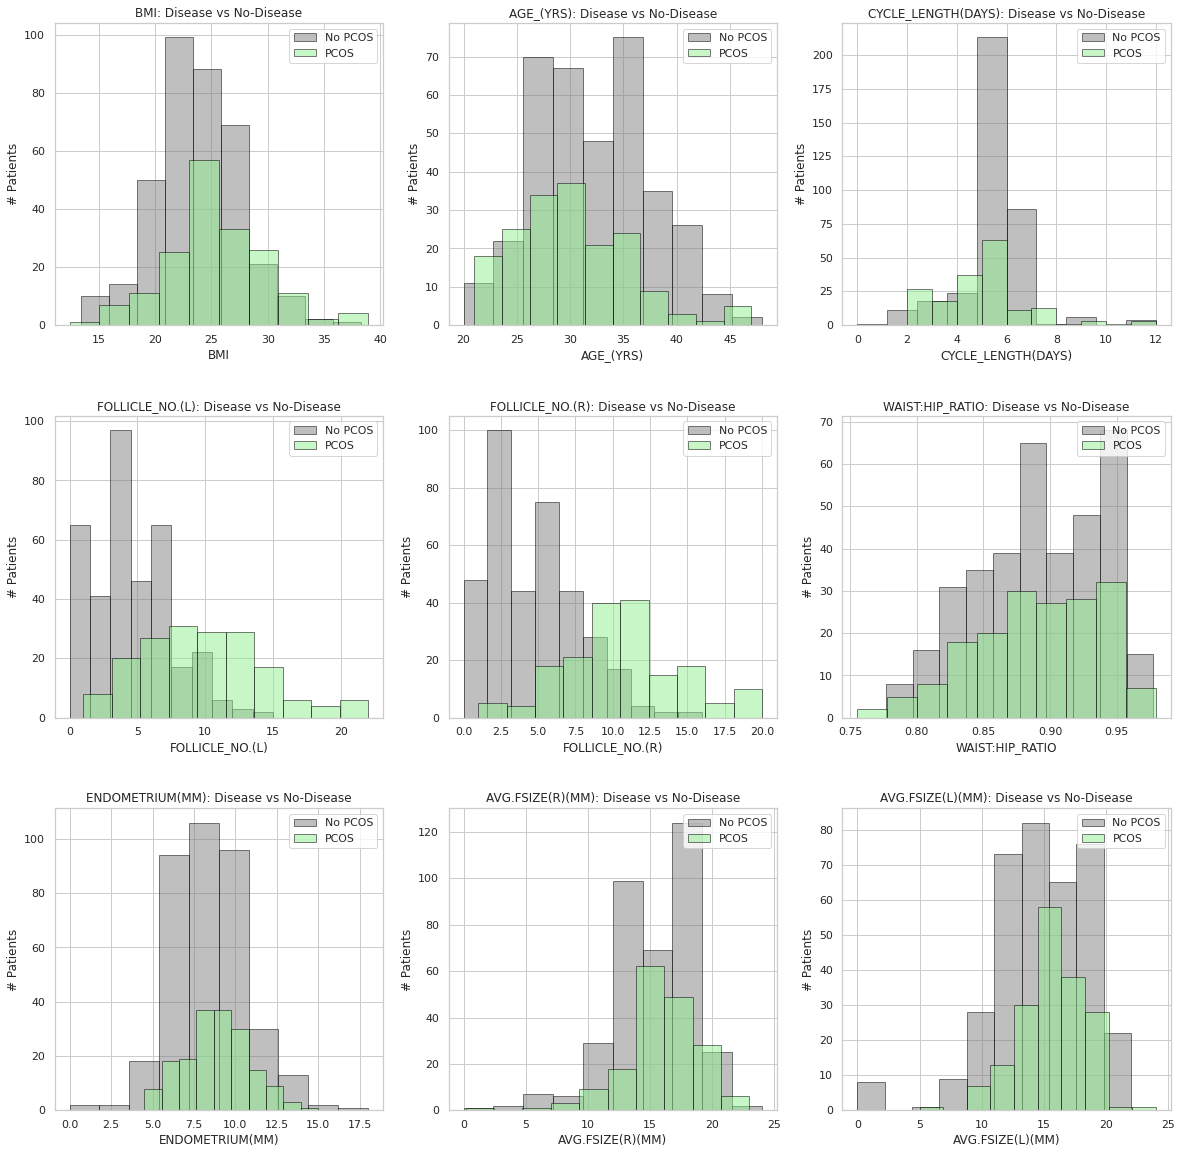

In [ ]:

sns.set_style('whitegrid')
fig = plt.figure(figsize = (20, 20))
fig.subplots_adjust(hspace = .30)

cols = ['BMI','Age_(yrs)',"Cycle_length(days)",'Follicle_No.(L)','Follicle_No.(R)','Waist:Hip_Ratio','Endometrium(mm)','Avg.Fsize(R)(mm)','Avg.Fsize(L)(mm)']

for n in range(0,9):
    ax = fig.add_subplot(3,3,n+1)
    ax.hist(dummy_df[dummy_df['Class'] ==0][cols[n]], bins = 10, label ='No PCOS', alpha = .50,edgecolor= 'black',color ='grey')
    ax.hist(dummy_df[dummy_df['Class']==1][cols[n]], bins = 10, label = 'PCOS', alpha = .50, edgecolor = 'black',color = 'lightgreen')
    ax.set_title(cols[n].upper()+': Disease vs No-Disease')
    ax.set_xlabel(cols[n].upper())
    ax.set_ylabel('# Patients')
    ax.legend(loc = 'upper right')
plt.savefig('histograms_by_class.png')

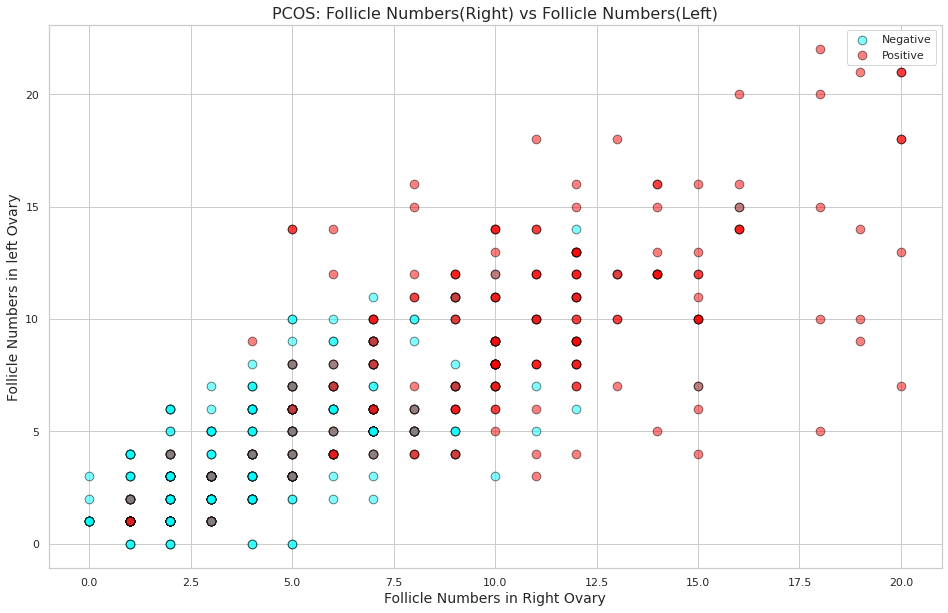

In [ ]:
# Subplots of Numeric Features
sns.set_style('whitegrid')
fig = plt.figure(figsize = (16,10))
#fig.subplots_adjust(hspace = .30)

#ax3 = fig.add_subplot(122)
plt.scatter(x = dummy_df[dummy_df['Class']==0]['Follicle_No.(R)'], y = dummy_df[dummy_df['Class']==0]['Follicle_No.(L)'],
                        alpha = .50,edgecolor= 'black',  c = 'cyan', s= 75, label = 'Negative')
plt.scatter(x = dummy_df[dummy_df['Class']==1]['Follicle_No.(R)'], y = dummy_df[dummy_df['Class']==1]['Follicle_No.(L)'],
                        alpha = .50,edgecolors= 'black',  c = 'red', s= 75, label = 'Positive')
plt.xlabel('Follicle Numbers in Right Ovary',fontsize=14)
plt.ylabel('Follicle Numbers in left Ovary',fontsize=14)
plt.title('PCOS: Follicle Numbers(Right) vs Follicle Numbers(Left)',fontsize=16)
plt.legend()

#plt.show()
plt.savefig('Follicle_Numbers(Right)_vs_Follicle_Numbers(Left).png')

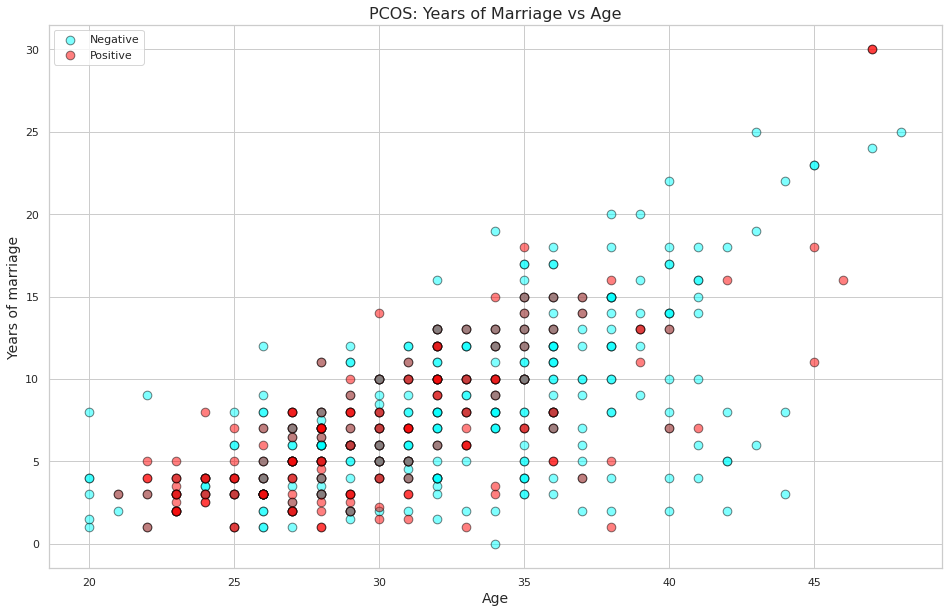

In [ ]:
# Subplots of Numeric Features
sns.set_style('whitegrid')
fig = plt.figure(figsize = (16,10))
#fig.subplots_adjust(hspace = .30)

#ax3 = fig.add_subplot(122)
plt.scatter(x = dummy_df[dummy_df['Class']==0]['Age_(yrs)'], y = dummy_df[dummy_df['Class']==0]['Marriage_Status_(Yrs)'],
                        alpha = .50,edgecolor= 'black',  c = 'cyan', s= 75, label = 'Negative')
plt.scatter(x = dummy_df[dummy_df['Class']==1]['Age_(yrs)'], y = dummy_df[dummy_df['Class']==1]['Marriage_Status_(Yrs)'],
                        alpha = .50,edgecolors= 'black',  c = 'red', s= 75, label = 'Positive')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Years of marriage',fontsize=14)
plt.title('PCOS: Years of Marriage vs Age',fontsize=16)
plt.legend()

#plt.show()
plt.savefig('Years_of_Marriage_vs_Age.png')

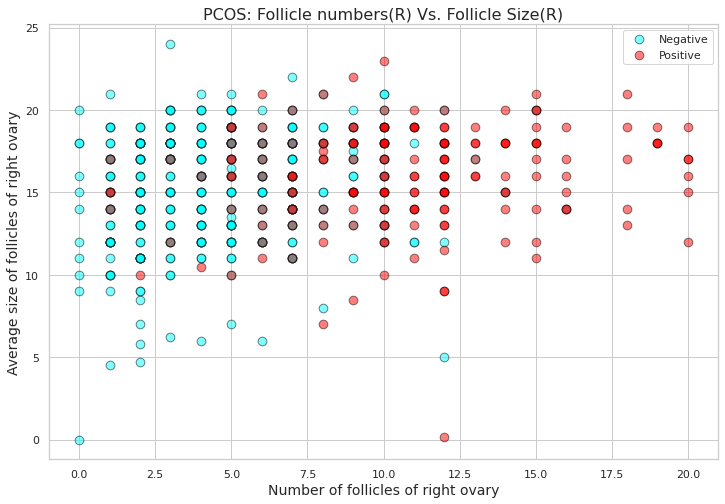

In [ ]:
# Subplots of Numeric Features
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,8))
#fig.subplots_adjust(hspace = .30)

#ax3 = fig.add_subplot(122)
plt.scatter(x = dummy_df[dummy_df['Class']==0]['Follicle_No.(R)'], y = dummy_df[dummy_df['Class']==0]['Avg.Fsize(R)(mm)'],
                        alpha = .50,edgecolor= 'black',  c = 'cyan', s= 75, label = 'Negative')
plt.scatter(x = dummy_df[dummy_df['Class']==1]['Follicle_No.(R)'], y = dummy_df[dummy_df['Class']==1]['Avg.Fsize(R)(mm)'],
                        alpha = .50,edgecolors= 'black',  c = 'red', s= 75, label = 'Positive')
plt.xlabel('Number of follicles of right ovary',fontsize=14)
plt.ylabel('Average size of follicles of right ovary',fontsize=14)
plt.title('PCOS: Follicle numbers(R) Vs. Follicle Size(R)',fontsize=16)
plt.legend()

#plt.show()
plt.savefig('Follicle numbers(R) Vs. Follicle Size(R).png')

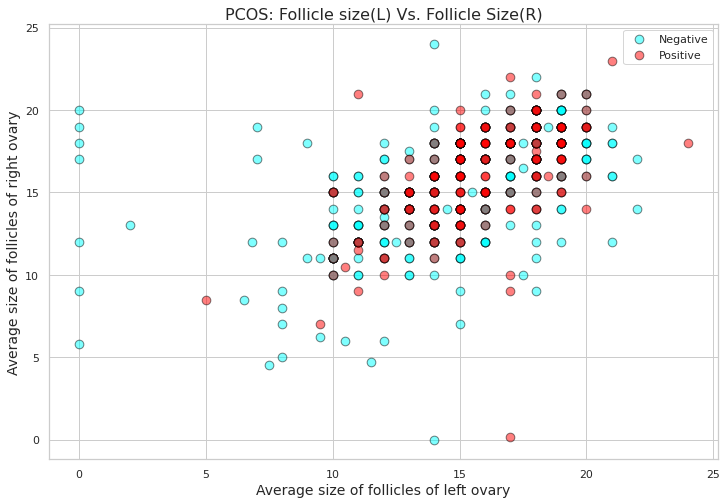

In [ ]:
# Subplots of Numeric Features
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,8))
#fig.subplots_adjust(hspace = .30)

#ax3 = fig.add_subplot(122)
plt.scatter(x = dummy_df[dummy_df['Class']==0]['Avg.Fsize(L)(mm)'], y = dummy_df[dummy_df['Class']==0]['Avg.Fsize(R)(mm)'],
                        alpha = .50,edgecolor= 'black',  c = 'cyan', s= 75, label = 'Negative')
plt.scatter(x = dummy_df[dummy_df['Class']==1]['Avg.Fsize(L)(mm)'], y = dummy_df[dummy_df['Class']==1]['Avg.Fsize(R)(mm)'],
                        alpha = .50,edgecolors= 'black',  c = 'red', s= 75, label = 'Positive')
plt.xlabel('Average size of follicles of left ovary', fontsize=14)
plt.ylabel('Average size of follicles of right ovary', fontsize=14)
plt.title('PCOS: Follicle size(L) Vs. Follicle Size(R)', fontsize=16)
plt.legend()

#plt.show()
plt.savefig('Follicle size(L) Vs. Follicle Size(R).png')

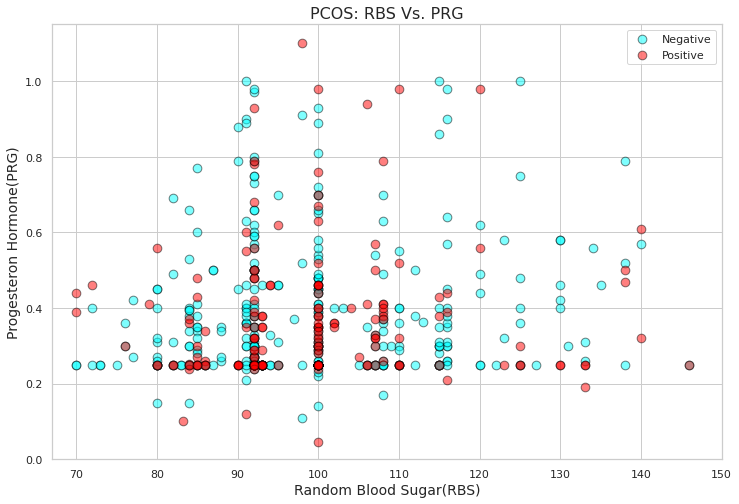

In [ ]:
# Subplots of Numeric Features
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,8))
#fig.subplots_adjust(hspace = .30)

#ax3 = fig.add_subplot(122)
plt.scatter(x = dummy_df[dummy_df['Class']==0]['RBS(mg/dl)'], y = dummy_df[dummy_df['Class']==0]['PRG(ng/mL)'],
                        alpha = .50,edgecolor= 'black',  c = 'cyan', s= 75, label = 'Negative')
plt.scatter(x = dummy_df[dummy_df['Class']==1]['RBS(mg/dl)'], y = dummy_df[dummy_df['Class']==1]['PRG(ng/mL)'],
                        alpha = .50,edgecolors= 'black',  c = 'red', s= 75, label = 'Positive')
plt.xlim(67,150)
plt.ylim(0,1.15)
plt.xlabel('Random Blood Sugar(RBS)', fontsize=14)
plt.ylabel('Progesteron Hormone(PRG)', fontsize=14)
plt.title('PCOS: RBS Vs. PRG', fontsize=16)
plt.legend()

#plt.show()
plt.savefig('RBS Vs. PRG.png')

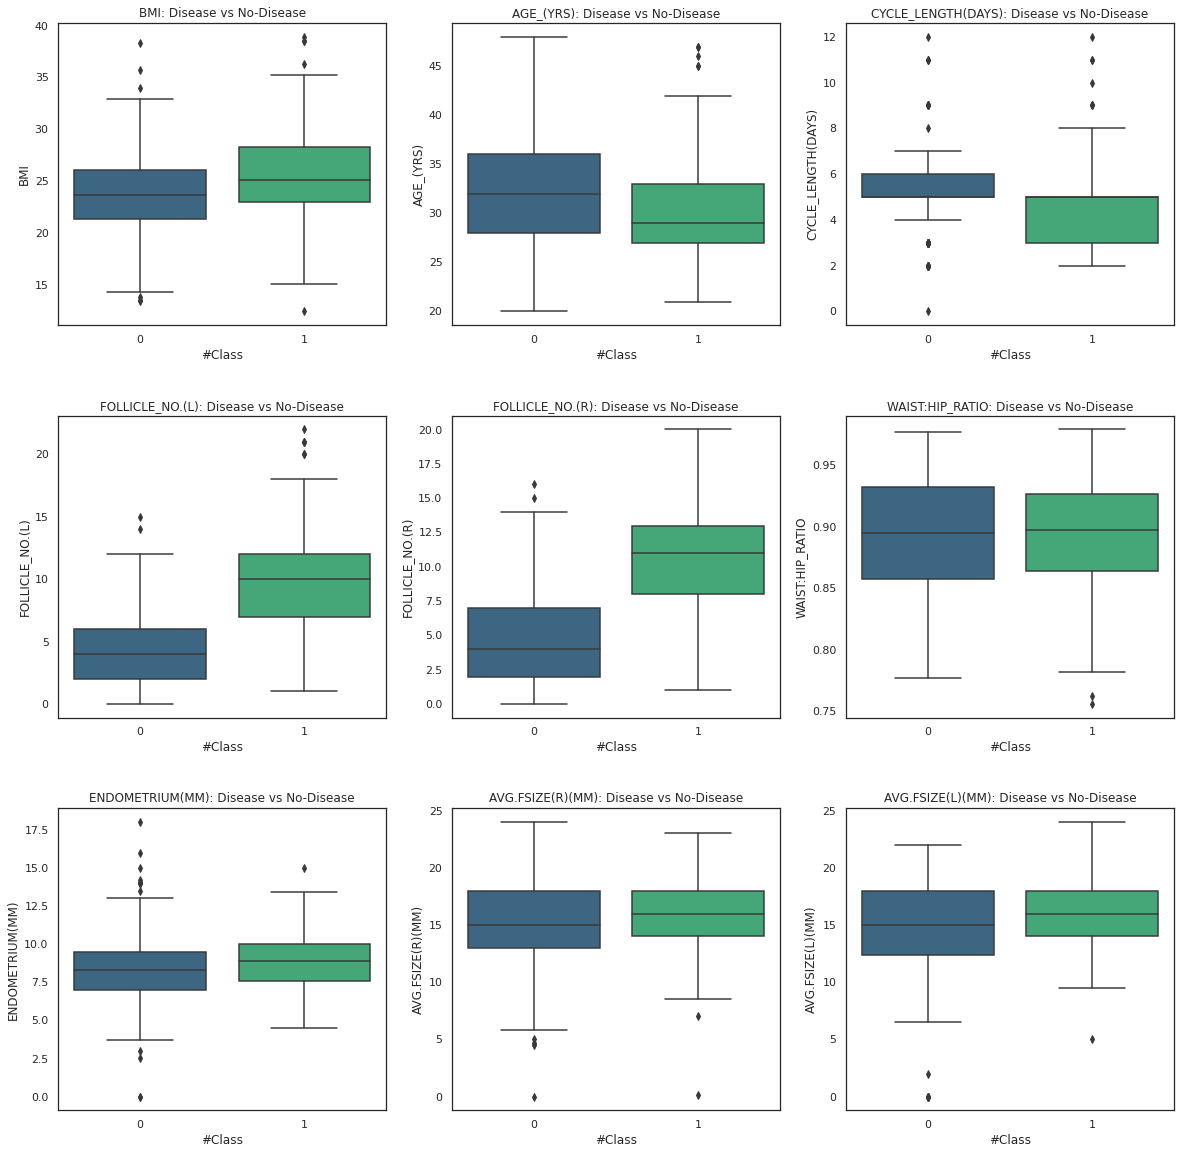

In [ ]:

sns.set_style('white')
fig = plt.figure(figsize = (20, 20))
fig.subplots_adjust(hspace = .30)

cols = ['BMI','Age_(yrs)',"Cycle_length(days)",'Follicle_No.(L)','Follicle_No.(R)','Waist:Hip_Ratio','Endometrium(mm)','Avg.Fsize(R)(mm)','Avg.Fsize(L)(mm)']

for n in range(0,9):
    ax = fig.add_subplot(3,3,n+1)
    sns.boxplot(x='Class', y=cols[n], data=dummy_df,ax=ax, palette='viridis')
    #ax.hist(dummy_df[dummy_df['Class']==1][cols[n]], bins = 10, label = 'PCOS', alpha = .50, edgecolor = 'black',color = 'lightgreen')
    plt.title(cols[n].upper()+': Disease vs No-Disease')
    plt.xlabel('#Class')
    plt.ylabel(cols[n].upper())
#plt.show()
    
plt.savefig('Boxplots.png')


In [ ]:
cleaned_df['Blood_Group']

0       O+
1       O+
2       A+
3       B+
4       A+
      ... 
536    AB+
537     O+
538     B+
539     O+
540     B+
Name: Blood_Group, Length: 541, dtype: object

In [ ]:
dummy_df['Blood_Group_Categories']=cleaned_df['Blood_Group']

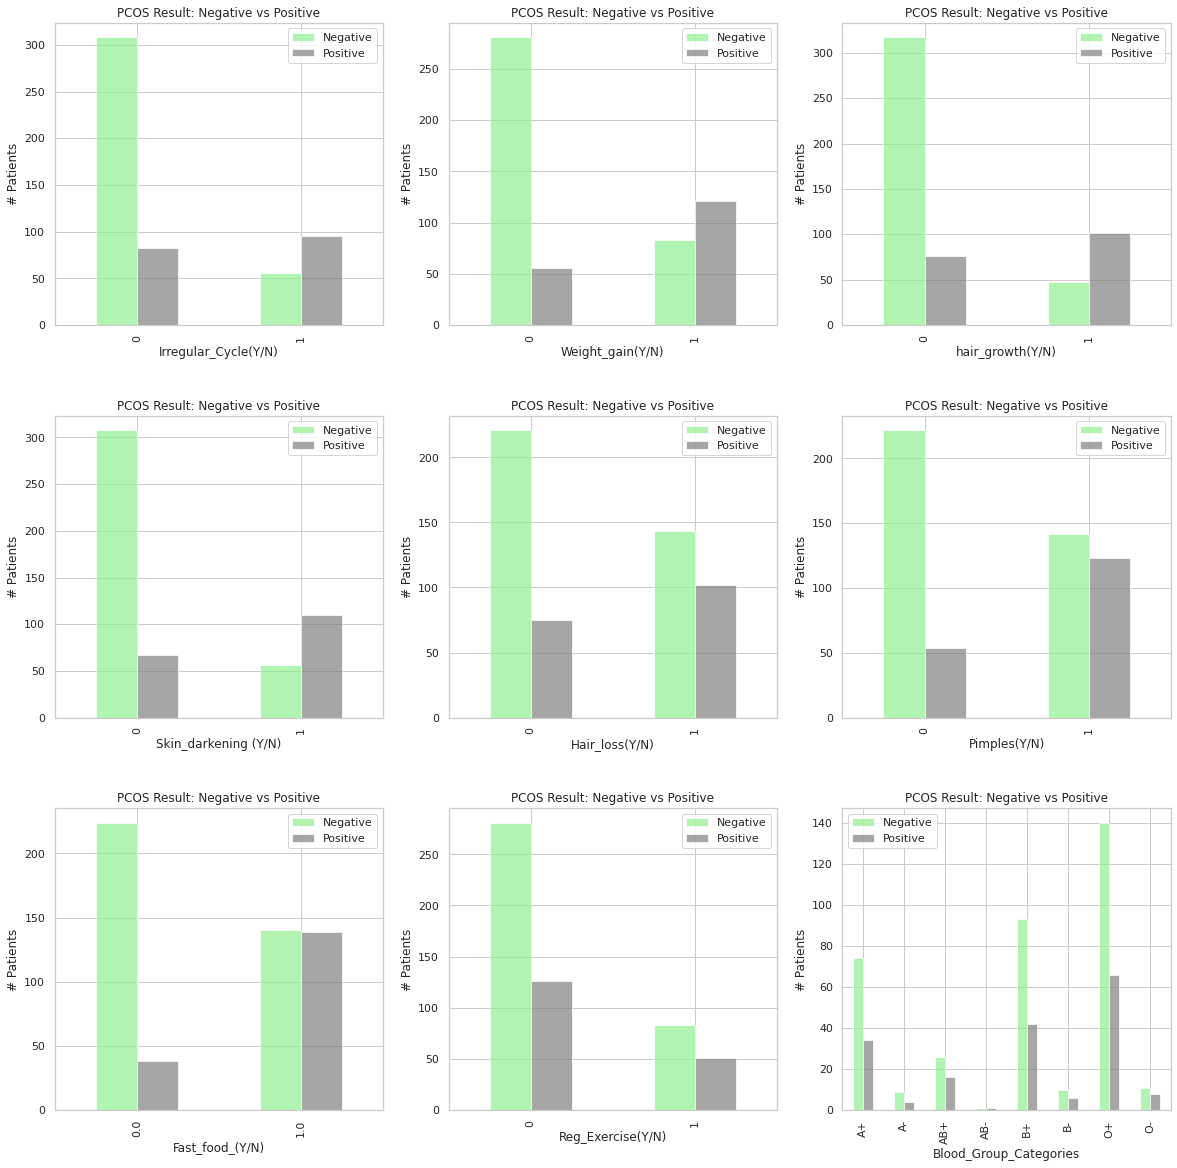

In [ ]:
bin_cols= ['Irregular_Cycle(Y/N)','Weight_gain(Y/N)', 'hair_growth(Y/N)',
       'Skin_darkening (Y/N)', 'Hair_loss(Y/N)', 'Pimples(Y/N)',
       'Fast_food_(Y/N)', 'Reg_Exercise(Y/N)','Blood_Group_Categories']
sns.set_style('whitegrid')
fig = plt.figure(figsize = (20, 20))
fig.subplots_adjust(hspace = .30)

for n in range(0,9):
  ax = fig.add_subplot(3,3,n+1)
  sibsp = dummy_df.groupby([bin_cols[n],'Class'])[bin_cols[n]].count().unstack()
  p2 = sibsp.plot(kind = 'bar',color = ['lightgreen','grey'], alpha = .70,ax=ax)
  p2.set_title('PCOS Result: Negative vs Positive')
  p2.set_xlabel(bin_cols[n])
  p2.set_ylabel('# Patients')
  p2.legend(['Negative','Positive'])
#plt.show()
plt.savefig('Histograms_by_binary_class.png')

In [ ]:
dummy_df.drop(columns=['Blood_Group_Categories'],inplace=True)


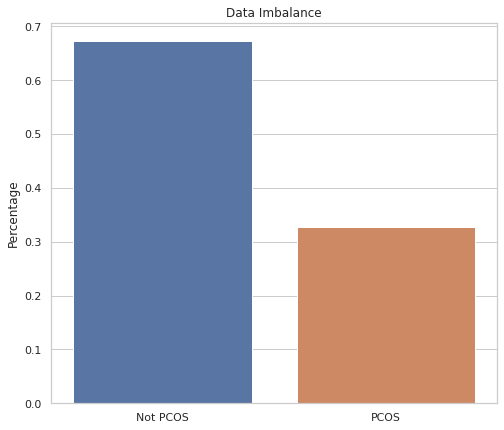

In [ ]:
plt.figure(figsize=(8,7))
sns.barplot(y=dummy_df['Class'].value_counts(normalize=True), x = ['Not PCOS', 'PCOS'])
plt.ylabel('Percentage')
plt.title('Data Imbalance')
#plt.show()
plt.savefig('Data Imbalance.png')

# **Feature Selection**

Since we have BMI, FSH/LH and Hip:Waist ratio, therefore we can drop these six solumns below as both sets of columns convey similar information. 

In [ ]:
dummy_df.drop(columns=['Weight_(Kg)','Height(m)','FSH(mIU/mL)','LH(mIU/mL)','Hip(inch)','Waist(inch)'],inplace=True)

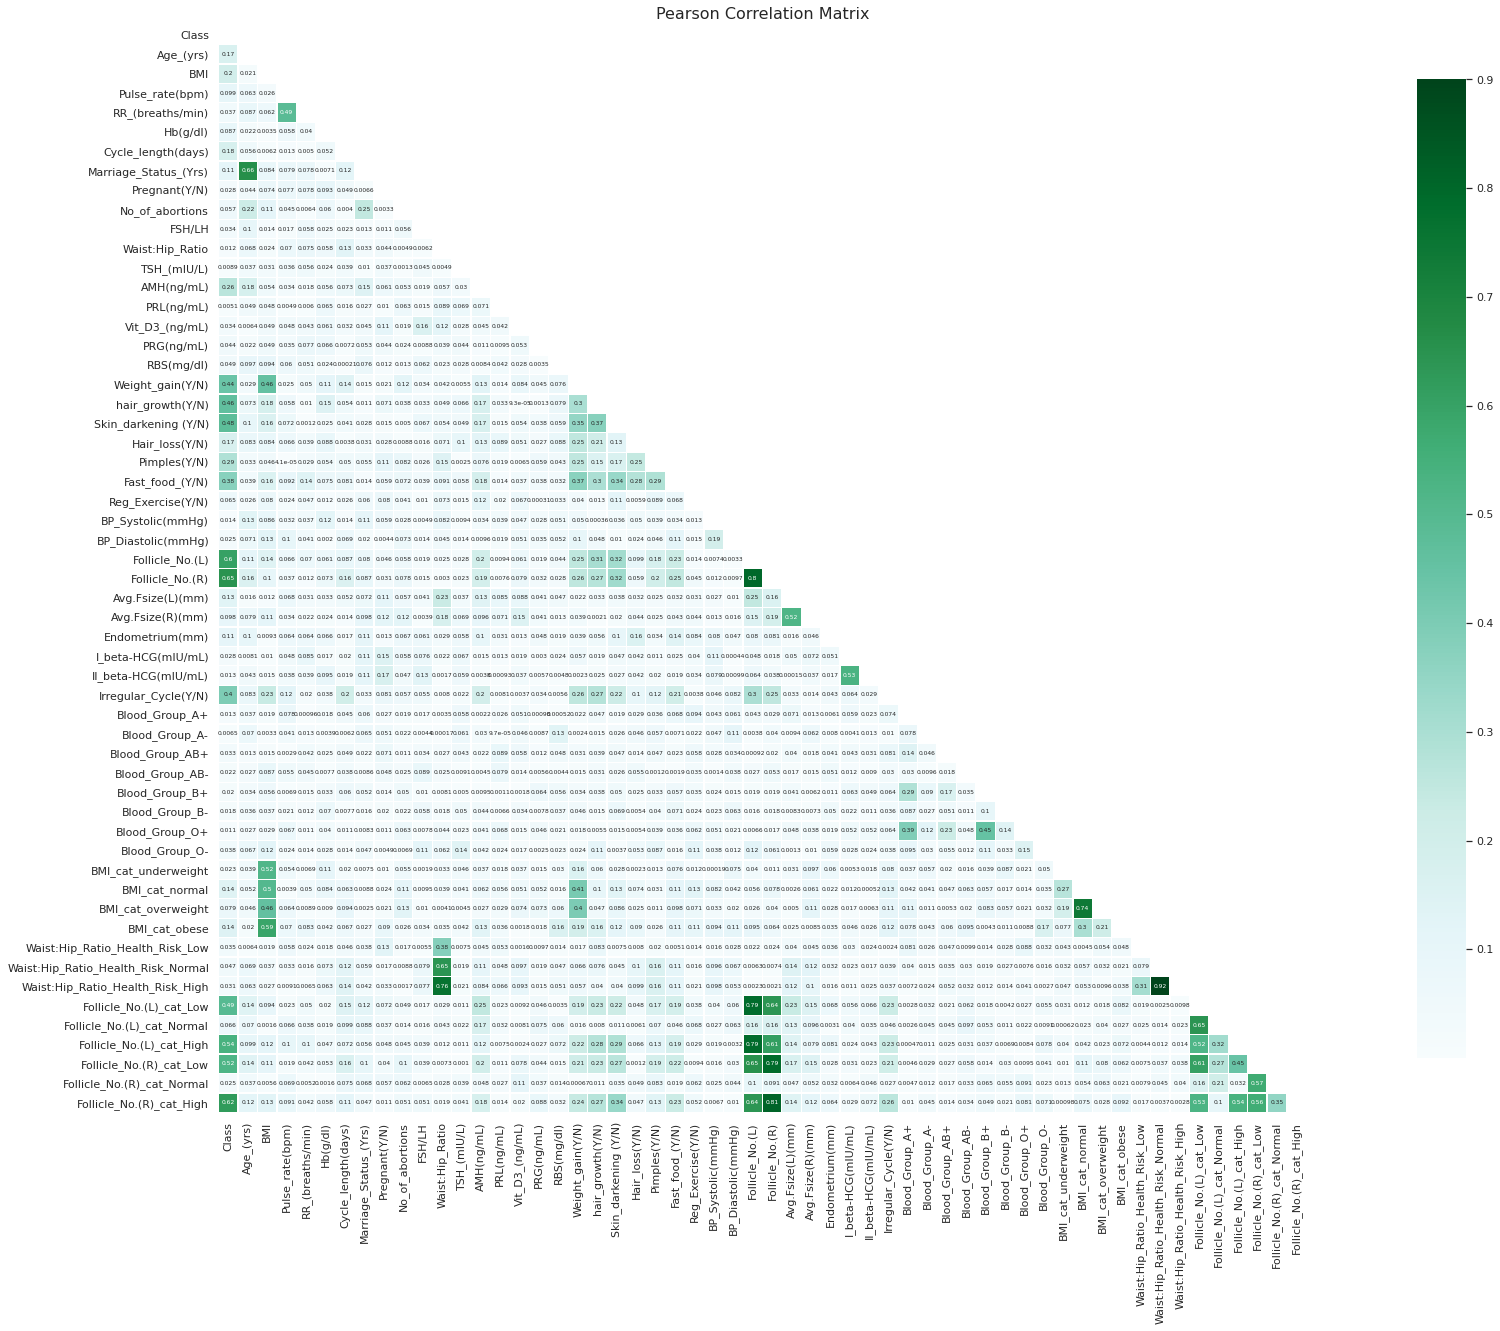

In [ ]:

# check the columns for multi co-linearity
mask = np.zeros_like(dummy_df.corr().abs(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(40, 20))
plt.title('Pearson Correlation Matrix',fontsize=16)

sns.heatmap(dummy_df.corr().abs(),linewidths=0.25,vmax=0.9,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":6},mask=mask,cbar_kws={"shrink": .9});
#plt.show()
plt.savefig('All_Correlation.png')

In [ ]:
#Identifying Features which have more than 0.25 correlation with PCOS(Y/N)

corr_features=dummy_df.corrwith(dummy_df["Class"]).abs().sort_values(ascending=False)
#features with correlation more than 0.25
corr_features=corr_features[corr_features>0.25].index
corr_features

Index(['Class', 'Follicle_No.(R)', 'Follicle_No.(R)_cat_High',
       'Follicle_No.(L)', 'Follicle_No.(L)_cat_High',
       'Follicle_No.(R)_cat_Low', 'Follicle_No.(L)_cat_Low',
       'Skin_darkening (Y/N)', 'hair_growth(Y/N)', 'Weight_gain(Y/N)',
       'Irregular_Cycle(Y/N)', 'Fast_food_(Y/N)', 'Pimples(Y/N)',
       'AMH(ng/mL)'],
      dtype='object')

In [ ]:
df=dummy_df[corr_features]
df.head()

,Class,Follicle_No.(R),Follicle_No.(R)_cat_High,Follicle_No.(L),Follicle_No.(L)_cat_High,Follicle_No.(R)_cat_Low,Follicle_No.(L)_cat_Low,Skin_darkening (Y/N),hair_growth(Y/N),Weight_gain(Y/N),Irregular_Cycle(Y/N),Fast_food_(Y/N),Pimples(Y/N),AMH(ng/mL)
0,0,3,0,3,0,1,1,0,0,0,0,1.0,0,2.07
1,0,5,0,3,0,1,1,0,0,0,0,0.0,0,1.53
2,1,15,1,13,1,0,0,0,0,0,0,1.0,1,6.63
3,0,2,0,2,0,1,1,0,0,0,0,0.0,0,1.22
4,0,4,0,3,0,1,1,0,0,0,0,0.0,0,2.26


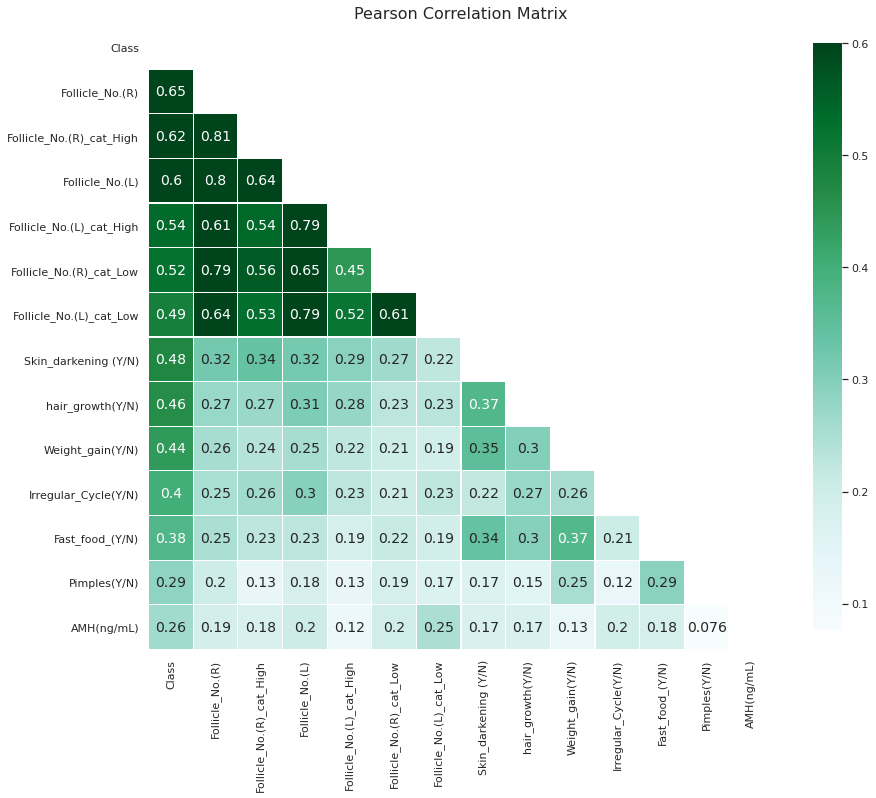

In [ ]:
# check the columns for multi co-linearity
mask = np.zeros_like(df.corr().abs(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(14,12))
plt.title('Pearson Correlation Matrix',fontsize=16)
#sns.heatmap(dummy_df.corr(), annot=True)
sns.heatmap(df.corr().abs(),linewidths=0.25,vmax=0.6,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":14},mask=mask,cbar_kws={"shrink": .9});
#plt.show()
plt.savefig('Correlation_With_Engineered_Feature.png')

In [ ]:
df.drop(columns=['Follicle_No.(R)_cat_High','Follicle_No.(L)_cat_High','Follicle_No.(R)_cat_Low','Follicle_No.(L)_cat_Low'],inplace=True)

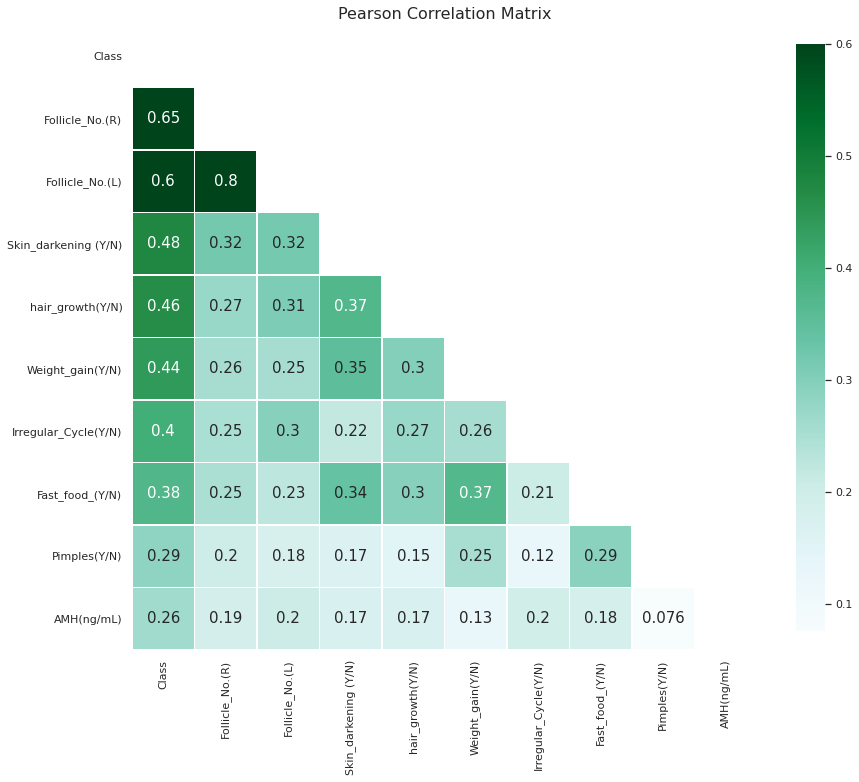

In [ ]:

# check the columns for multi co-linearity
mask = np.zeros_like(df.corr().abs(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(14,12))
plt.title('Pearson Correlation Matrix',fontsize=16)
#sns.heatmap(dummy_df.corr(), annot=True)
sns.heatmap(df.corr().abs(),linewidths=0.25,vmax=0.6,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":15},mask=mask,cbar_kws={"shrink": .9});
#plt.show()
plt.savefig('Final_Correlation.png')

In [ ]:
df.to_csv('Cleaned_PCOS_Final.csv',index=False)  #saved the dataframe as a CSV file

In [ ]:
#Separated the features and target into two different variables for later model fitting purporses
model_target=df.Class
model_feat=df.drop('Class', axis=1)
print(model_target.shape)
print(model_feat.shape)

(541,)
(541, 9)


# **Modelling Process**

## **Normalization**

Next we have to standardize the data frame features for modelling purposes because the values can't be on different scale.

In [ ]:
# normalized = value - mean / standard deviation
norm_df = (df - df.mean())/ df.std()
norm_df['Class'] = df['Class']  # plug back in the original values for the target

In [ ]:
norm_df.head()

,Class,Follicle_No.(R),Follicle_No.(L),Skin_darkening (Y/N),hair_growth(Y/N),Weight_gain(Y/N),Irregular_Cycle(Y/N),Fast_food_(Y/N),Pimples(Y/N),AMH(ng/mL)
0,0,-0.820711,-0.739932,-0.664717,-0.613102,-0.777317,-0.621662,0.968159,-0.978964,-0.604184
1,0,-0.369945,-0.739932,-0.664717,-0.613102,-0.777317,-0.621662,-1.030979,-0.978964,-0.696072
2,1,1.883886,1.624529,-0.664717,-0.613102,-0.777317,-0.621662,0.968159,1.019600,0.171756
3,0,-1.046094,-0.976378,-0.664717,-0.613102,-0.777317,-0.621662,-1.030979,-0.978964,-0.748822
4,0,-0.595328,-0.739932,-0.664717,-0.613102,-0.777317,-0.621662,-1.030979,-0.978964,-0.571853


## **Train Test Split**

In [ ]:
test_set=norm_df[433:]  # Validation Set
train_set=norm_df[0:433]  #train test set


In [ ]:
test_target=test_set.Class  # separated the target column into a series
test_features=test_set.drop('Class', axis=1)  # created a feature matrix
print(test_target.shape)
print(test_features.shape)

(108,)
(108, 9)


In [ ]:
target=train_set.Class  # separated the target column into a series
features=train_set.drop('Class', axis=1)  # created a feature matrix
print(target.shape)
print(features.shape)


(433,)
(433, 9)


In [ ]:
# split the train data further into a train and a test set in 8:2 ratio
from sklearn.model_selection import train_test_split  #

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=23)

In [ ]:
#checked the dimension of the train test splits to make sure they are correct
print("Train features dimension: ", X_train.shape)
print("Train target dimension: ", y_train.shape)
print("Test features dimension: ", X_test.shape)
print("Test target dimension: ", y_test.shape)

Train features dimension:  (346, 9)
Train target dimension:  (346,)
Test features dimension:  (87, 9)
Test target dimension:  (87,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))  # Number of positive class
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))  # Number of negative class

Before OverSampling, counts of label '1': 104
Before OverSampling, counts of label '0': 242 



In order to tackle the class imbalance, we have to oversample the minority class which is positive. For this we used SMOTE technique (Synthetic Minority Oversampling Technique) which will make the minority class equivalent to the majority class.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())  # Implemented the oversampling

In [ ]:
#Checked the shape of the oversampled train features and class
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
#Checked the value count of Positive and negative classes after SMOTE Oversampling
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (484, 9)
After OverSampling, the shape of train_y: (484,) 

After OverSampling, counts of label '1': 242
After OverSampling, counts of label '0': 242


For modelling purposes, we will implement GridSearchCV to find the best parameters for each algorithm.

# **Logistic Regression** 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score  # imported evaluation metrics

In [ ]:
lr = LogisticRegression()  # instantiate the model object
#'newton-cg', 'lbfgs', 'liblinear'', 'sag', 'saga'
param_dict={'solver':[ 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.1,0.5, 0.6, 0.7], 
           'penalty': ['l1', 'l2', 'elasticnet', 'none']}  # set parameters to be searched through GridSearch

#create the instance of GridSearchCV using the recall metric for our scoring. 
grid_tree= GridSearchCV(lr, param_dict, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
#fit the Gridsearch to our data
grid_tree.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 0.6, 0.7],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:

print(grid_tree.best_score_)  # outputs the best metric score

print(grid_tree.best_params_)  # outputs the parameters with best result

print(grid_tree.best_estimator_)  # outputs the model with the best parameters

0.9153135738831615
{'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:

train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.925
Test Accuracy: 0.954 

Train Recall: 0.904
Test Recall: 0.941 

Test F1: 0.941
Test Precision: 0.941


In [ ]:
logreg= grid_tree.best_estimator_

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.94      0.94      0.94        34

    accuracy                           0.95        87
   macro avg       0.95      0.95      0.95        87
weighted avg       0.95      0.95      0.95        87

Confusion Matrix: 
 [[51  2]
 [ 2 32]]


In [ ]:
recalls = {'Logistic Regression': recall_score(y_test, y_pred )}
accuracies= {'Logistic Regression': accuracy_score(y_test, y_pred )}
f1= {'Logistic Regression': f1_score(y_test, y_pred)}
precisions= {'Logistic Regression': precision_score(y_test, y_pred )}

In [ ]:
recalls

{'Logistic Regression': 0.9411764705882353}

In [ ]:
accuracies

{'Logistic Regression': 0.9540229885057471}

In [ ]:
f1

{'Logistic Regression': 0.9411764705882353}

In [ ]:
precisions

{'Logistic Regression': 0.9411764705882353}

In [ ]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Logistic Regression', fontsize=20)

Confusion Matrix, without normalization
[[51  2]
 [ 2 32]]


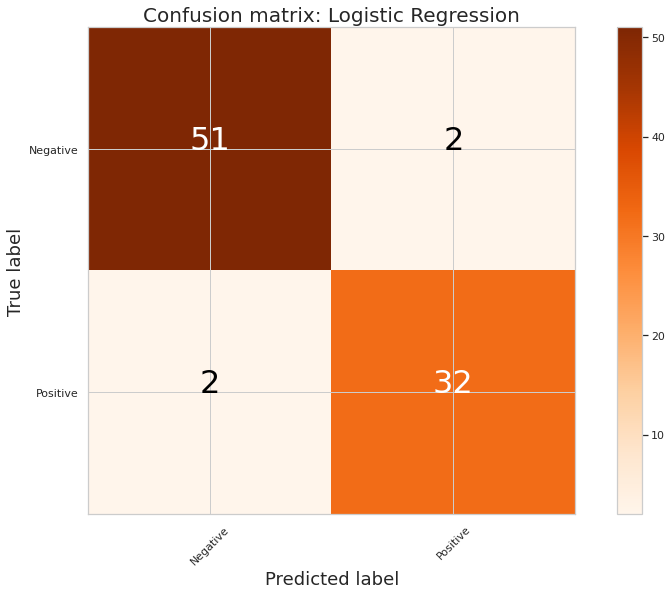

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_Logreg.png')

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

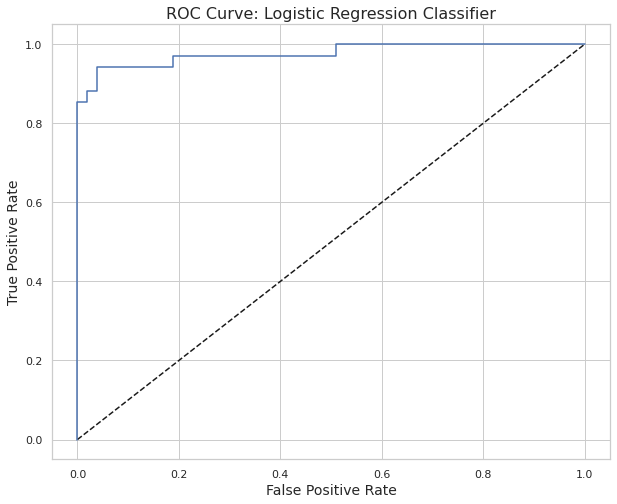

In [ ]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression Classifier')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curve: Logistic Regression Classifier', fontsize=16)
#plt.show()
plt.savefig('ROC Curve: Logistic Regression Classifier.png')

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC Score of Logistic Regression Classifier: %.3f"% metrics.roc_auc_score(y_test, y_pred_proba))

ROC Score of Logistic Regression Classifier: 0.977


In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("Cross Validation Score of Logistic Regression Classifier: %.3f"%cross_val_score(logreg, features, target, cv=10, scoring='roc_auc').mean())

Cross Validation Score of Logistic Regression Classifier: 0.968


In [ ]:
lr_coefs = pd.DataFrame(data = grid_tree.best_estimator_.coef_[0], index = X_test.columns, columns= ['coef'])
sort_coef= lr_coefs.sort_values(by='coef', ascending=True)

In [ ]:
abs_coef = np.abs(sort_coef['coef']).sort_values(ascending = False)
logistic_features = abs_coef.index
logistic_features

Index(['Follicle_No.(R)', 'hair_growth(Y/N)', 'Weight_gain(Y/N)',
       'Skin_darkening (Y/N)', 'Irregular_Cycle(Y/N)', 'Pimples(Y/N)',
       'Follicle_No.(L)', 'AMH(ng/mL)', 'Fast_food_(Y/N)'],
      dtype='object')

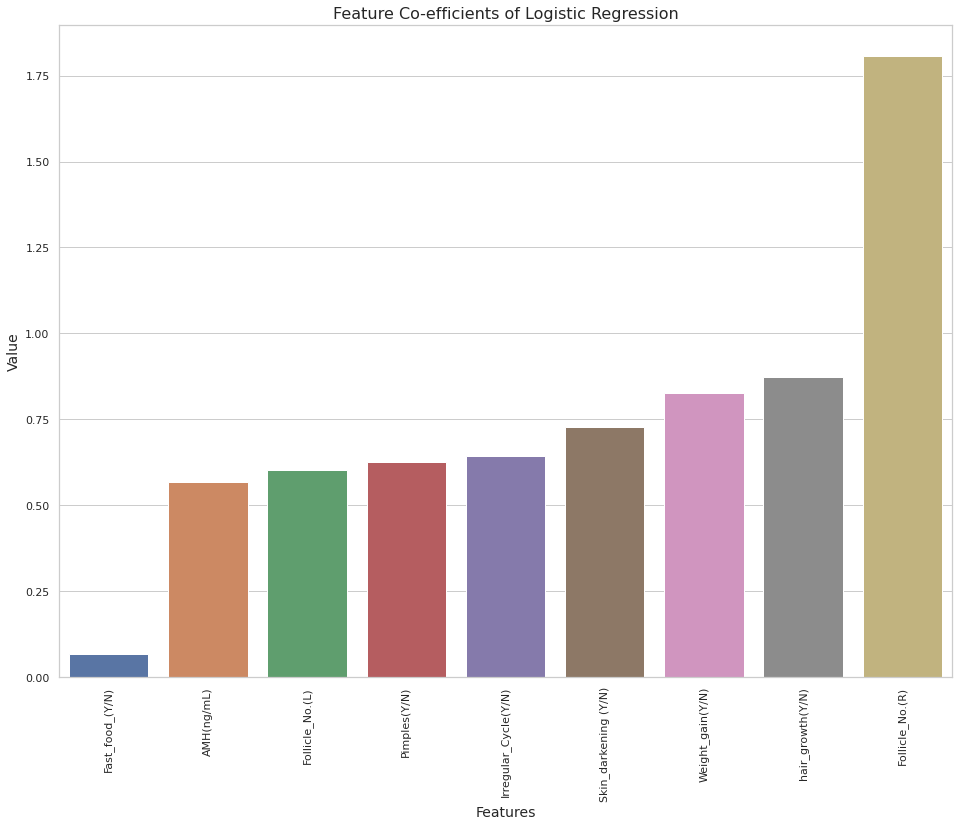

In [ ]:
plt.figure(figsize= (16,12))
sns.barplot(x = sort_coef.index, y = sort_coef['coef'],)
plt.ylabel('Value',fontsize=14)
plt.xlabel('Features',fontsize=14)
plt.title('Feature Co-efficients of Logistic Regression',fontsize=16)
plt.xticks(rotation = 'vertical')
#plt.show()
plt.savefig('feat_coef_logreg.png')

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=1)

In [ ]:
# creating our parameters to test
param_dict={'max_depth': [2,3,4,5], 'min_samples_leaf':range(10,40,1), 'criterion': ['gini','entropy'],
           'max_features': range(0,9)}

In [ ]:
#create the instance of GridSearchCV using the recall metric for our scoring. 
grid_tree= GridSearchCV(decision_tree, param_dict, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
#fit the Gridsearch to our data
grid_tree.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 2812 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 10800 out of 10800 | elapsed:   14.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5], 'max_features': ra

In [ ]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9070231958762885
{'criterion': 'gini', 'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 13}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=13, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [ ]:

train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.908
Test Accuracy: 0.897 

Train Recall: 0.837
Test Recall: 0.824 

Test F1: 0.862
Test Precision: 0.903


In [ ]:
dt= grid_tree.best_estimator_

In [ ]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.94      0.92        53
           1       0.90      0.82      0.86        34

    accuracy                           0.90        87
   macro avg       0.90      0.88      0.89        87
weighted avg       0.90      0.90      0.90        87

Confusion Matrix: 
 [[50  3]
 [ 6 28]]


In [ ]:
recalls['Decision_Tree'] = recall_score(y_test, y_pred)
accuracies['Decision_Tree'] = accuracy_score(y_test, y_pred)
precisions['Decision_Tree'] = precision_score(y_test, y_pred)
f1['Decision_Tree'] = f1_score(y_test, y_pred)
recalls

{'Decision_Tree': 0.8235294117647058, 'LogReg': 0.9411764705882353}

In [ ]:
accuracies

{'Decision_Tree': 0.896551724137931, 'LogReg': 0.9540229885057471}

In [ ]:
precisions

{'Decision_Tree': 0.9032258064516129, 'LogReg': 0.9411764705882353}

In [ ]:
f1

{'Decision_Tree': 0.8615384615384616, 'LogReg': 0.9411764705882353}

In [ ]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Decision Tree', fontsize=20)

Confusion Matrix, without normalization
[[50  3]
 [ 6 28]]


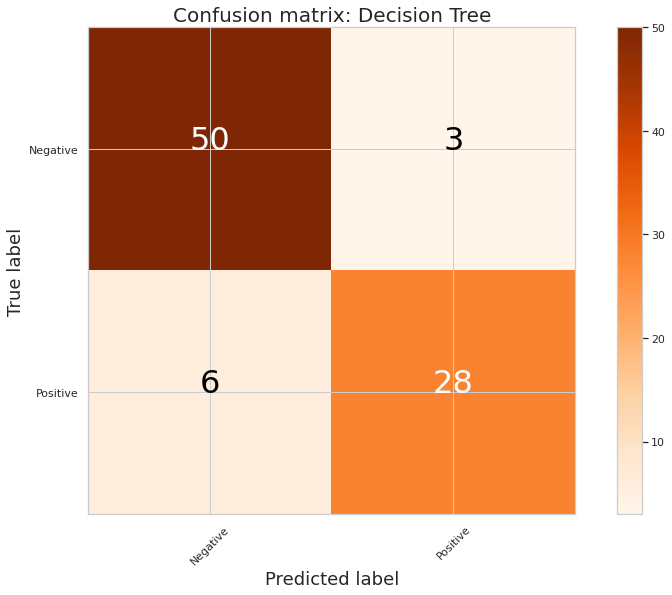

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_DT.png')

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

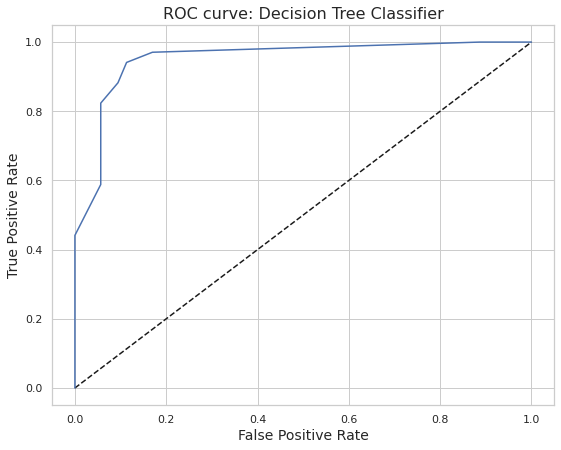

In [ ]:
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Decision Tree Classifier')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve: Decision Tree Classifier',fontsize=16)
#plt.show()
plt.savefig('ROC_Curve_DT.png')

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC Score of Decision Tree Classifier: %.3f"% metrics.roc_auc_score(y_test, y_pred_proba))

ROC Score of Decision Tree Classifier: 0.952


In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("Cross Validation Score of Decision Tree Classifier: %.3f"%cross_val_score(dt, features, target, cv=10, scoring='roc_auc').mean())

Cross Validation Score of Decision Tree Classifier: 0.940


In [ ]:
dt.feature_importances_

array([0.24636346, 0.00994981, 0.29140376, 0.44384915, 0.        ,
       0.        , 0.00843381, 0.        , 0.        ])

In [ ]:
def get_fi(m, df):
    return pd.DataFrame({'col': X_test.columns, 'imp': m.feature_importances_}).sort_values('imp',ascending=False)

#lets get the feature importances for training set
fi = get_fi(dt,X_train)

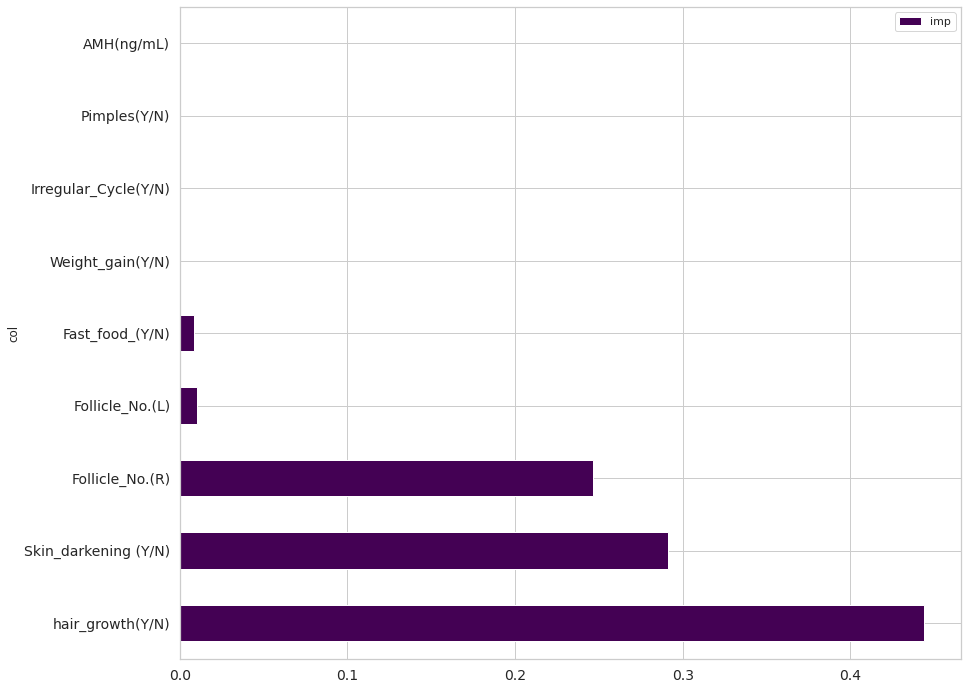

In [ ]:
def plot_fi(df):
    df.plot('col','imp','barh',figsize=(14,12),cmap='viridis', fontsize=14)
    
plot_fi(fi)
plt.savefig('Decision Tree Feature Importance.png')

# **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
param_dict = {'n_neighbors': range(3,21), 'metric': ['manhattan','euclidean','minkowski'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [ ]:
grid_tree= GridSearchCV(knn, param_dict, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
grid_tree.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    5.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['manhattan', 'euclidean', 'minkowski'],
                         'n_neighbors': range(3, 21)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9132302405498282
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.919
Test Accuracy: 0.908 

Train Recall: 0.933
Test Recall: 0.853 

Test F1: 0.879
Test Precision: 0.906


In [ ]:
kn= grid_tree.best_estimator_

In [ ]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       0.91      0.85      0.88        34

    accuracy                           0.91        87
   macro avg       0.91      0.90      0.90        87
weighted avg       0.91      0.91      0.91        87

Confusion Matrix: 
 [[50  3]
 [ 5 29]]


In [ ]:
recalls['KNN'] = recall_score(y_test, y_pred)
accuracies['KNN'] = accuracy_score(y_test, y_pred)
precisions['KNN'] = precision_score(y_test, y_pred)
f1['KNN'] = f1_score(y_test, y_pred)
recalls

{'Decision_Tree': 0.8235294117647058,
 'KNN': 0.8529411764705882,
 'LogReg': 0.9411764705882353}

In [ ]:
accuracies

{'Decision_Tree': 0.896551724137931,
 'KNN': 0.9080459770114943,
 'LogReg': 0.9540229885057471}

In [ ]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
precisions

{'Decision_Tree': 0.9032258064516129,
 'KNN': 0.90625,
 'LogReg': 0.9411764705882353}

In [ ]:
f1

{'Decision_Tree': 0.8615384615384616,
 'KNN': 0.8787878787878787,
 'LogReg': 0.9411764705882353}

In [ ]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: KNN', fontsize=20)

Confusion Matrix, without normalization
[[50  3]
 [ 5 29]]


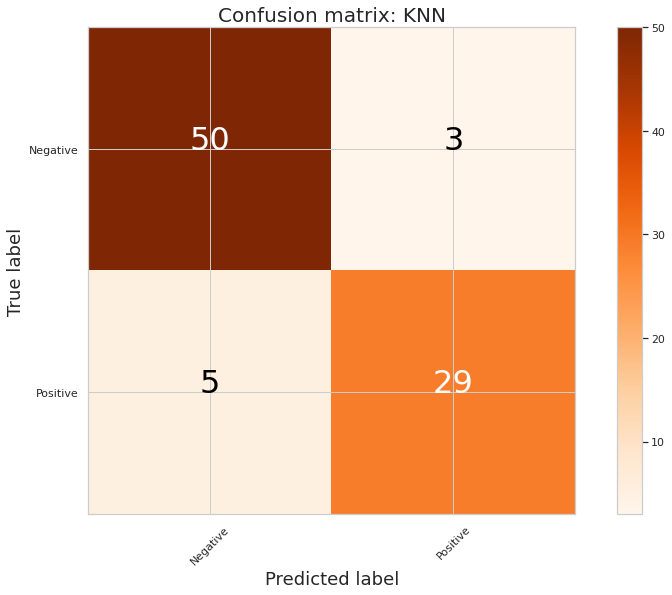

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_KNN.png')

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = kn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

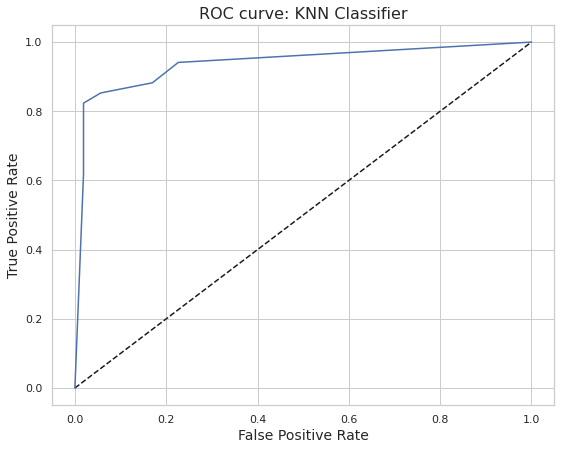

In [ ]:
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN Classifier')
plt.xlabel('False Positive Rate', fontsize= 14)
plt.ylabel('True Positive Rate',fontsize= 14)
plt.title('ROC curve: KNN Classifier', fontsize= 16)
#plt.show()
plt.savefig('ROC_Curve_KNN.png')

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC Score of KNN Classifier: %.3f"% metrics.roc_auc_score(y_test, y_pred_proba))

ROC Score of KNN Classifier: 0.938


In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("Cross Validation Score of KNN Classifier: %.3f"%cross_val_score(kn, features, target, cv=10, scoring='roc_auc').mean())

Cross Validation Score of KNN Classifier: 0.949


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfcc = RandomForestClassifier(random_state=137,max_depth=5)

In [ ]:
param_grid = {'n_estimators': [ 4, 6, 9], 
              'max_features': [ 'log2','sqrt',], 
              'criterion': [ 'gini', 'entropy'], 
              'min_samples_split': [ 5,8,10],
              'min_samples_leaf': [5,8,10]
             }

In [ ]:
grid_tree=GridSearchCV(rfcc, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
grid_tree.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    5.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=137,
                                    

In [ ]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9256443298969073
{'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 9}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=137,
                       verbose=0, warm_start=False)


In [ ]:
train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.928
Test Accuracy: 0.943 

Train Recall: 0.913
Test Recall: 0.912 

Test F1: 0.925
Test Precision: 0.939


In [ ]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.94      0.91      0.93        34

    accuracy                           0.94        87
   macro avg       0.94      0.94      0.94        87
weighted avg       0.94      0.94      0.94        87

Confusion Matrix: 
 [[51  2]
 [ 3 31]]


In [ ]:
recalls['Random Forest'] = recall_score(y_test, y_pred)
accuracies['Random Forest'] = accuracy_score(y_test, y_pred)
precisions['Random Forest'] = precision_score(y_test, y_pred)
f1['Random Forest'] = f1_score(y_test, y_pred)
recalls

{'Decision_Tree': 0.8235294117647058,
 'KNN': 0.8529411764705882,
 'LogReg': 0.9411764705882353,
 'random_forest': 0.9117647058823529}

In [ ]:
accuracies

{'Decision_Tree': 0.896551724137931,
 'KNN': 0.9080459770114943,
 'LogReg': 0.9540229885057471,
 'random_forest': 0.9425287356321839}

In [ ]:
precisions

{'Decision_Tree': 0.9032258064516129,
 'KNN': 0.90625,
 'LogReg': 0.9411764705882353,
 'random_forest': 0.9393939393939394}

In [ ]:
f1

{'Decision_Tree': 0.8615384615384616,
 'KNN': 0.8787878787878787,
 'LogReg': 0.9411764705882353,
 'random_forest': 0.9253731343283583}

In [ ]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Random Forest', fontsize=20)

Confusion Matrix, without normalization
[[51  2]
 [ 3 31]]


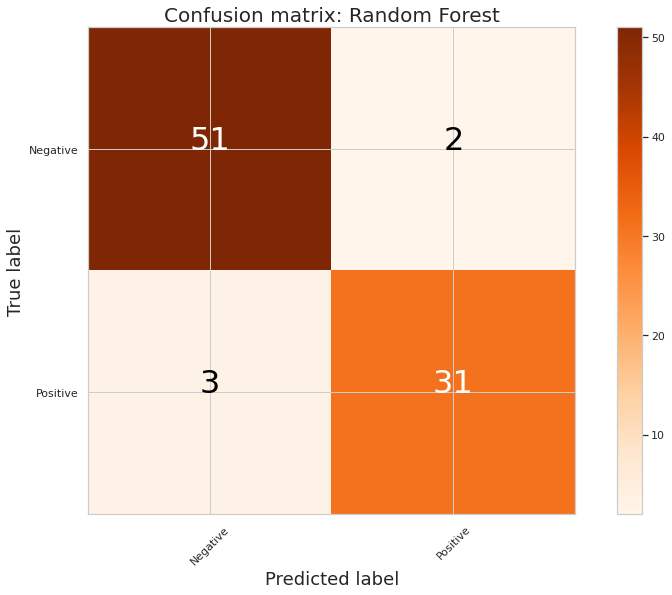

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_RF.png')

In [ ]:
rfc= grid_tree.best_estimator_

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = rfc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

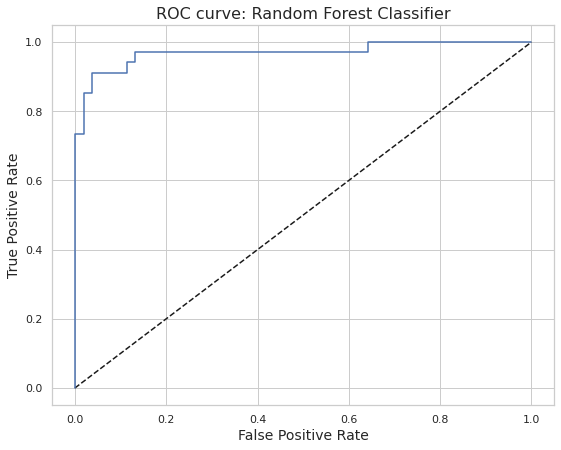

In [ ]:
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Random Forest Classifier')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve: Random Forest Classifier',fontsize=16)
#plt.show()
plt.savefig('ROC_Curve_RF.png')

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC Score of Random Forest Classifier: %.3f"% metrics.roc_auc_score(y_test, y_pred_proba))

ROC Score of Random Forest Classifier: 0.969


In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("ROC Score of Random Forest Classifier: %.3f"%cross_val_score(rfc, features, target, cv=10, scoring='roc_auc').mean())

ROC Score of Random Forest Classifier: 0.957


In [ ]:
rfc.feature_importances_

array([0.35105058, 0.0719342 , 0.10874167, 0.17727733, 0.1202934 ,
       0.07307209, 0.02201468, 0.02305173, 0.05256432])

In [ ]:
aa= pd.DataFrame({'Feature_names':X_test.columns,'Importances':rfc.feature_importances_})
rfc_1= aa.sort_values(by='Importances',ascending=False)
rfc_1

,Feature_names,Importances
0,Follicle_No.(R),0.351051
3,hair_growth(Y/N),0.177277
4,Weight_gain(Y/N),0.120293
2,Skin_darkening (Y/N),0.108742
5,Irregular_Cycle(Y/N),0.073072
1,Follicle_No.(L),0.071934
8,AMH(ng/mL),0.052564
7,Pimples(Y/N),0.023052
6,Fast_food_(Y/N),0.022015


In [ ]:
def get_fi(m, df):
    return pd.DataFrame({'col': X_test.columns, 'imp': m.feature_importances_}).sort_values('imp',ascending=False)

#lets get the feature importances for training set
fi = get_fi(rfc,X_train)

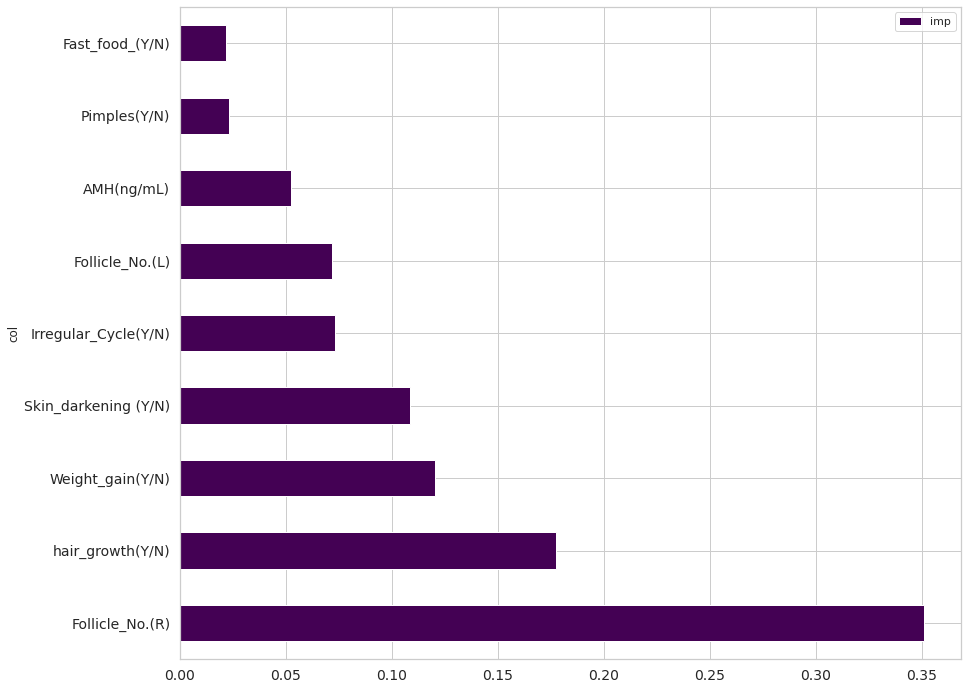

In [ ]:
def plot_fi(df):
    df.plot('col','imp','barh',figsize=(14,12),cmap='viridis', fontsize=14)
    
plot_fi(fi)
plt.savefig('Random Forest Feature Importance.png')

# **Gradient Boosting Machine**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
param_grid = [
{'n_estimators': [90,95,100],
'learning_rate':[0.1, 0.2,0.4],
'max_depth': [2,3,4,8],
'min_samples_split': [1,2,3,4]},
]

In [ ]:
grid_tree=GridSearchCV(gb, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
grid_tree.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   39.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9360180412371134
{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 90}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=90,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 1.000
Test Accuracy: 0.908 

Train Recall: 1.000
Test Recall: 0.853 

Test F1: 0.879
Test Precision: 0.906


In [ ]:
gb= grid_tree.best_estimator_

In [ ]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.91      0.94      0.93        53
           1       0.91      0.85      0.88        34

    accuracy                           0.91        87
   macro avg       0.91      0.90      0.90        87
weighted avg       0.91      0.91      0.91        87

Confusion Matrix: 
 [[50  3]
 [ 5 29]]


In [ ]:
recalls['Gradient_Boost'] = recall_score(y_test, y_pred)
accuracies['Gradient_Boost'] = accuracy_score(y_test, y_pred)
precisions['Gradient_Boost'] = precision_score(y_test, y_pred)
f1['Gradient_Boost'] = f1_score(y_test, y_pred)
recalls

{'Decision_Tree': 0.8235294117647058,
 'Gradient_Boost': 0.8529411764705882,
 'KNN': 0.8529411764705882,
 'LogReg': 0.9411764705882353,
 'random_forest': 0.9117647058823529}

In [ ]:
accuracies

{'Decision_Tree': 0.896551724137931,
 'Gradient_Boost': 0.9080459770114943,
 'KNN': 0.9080459770114943,
 'LogReg': 0.9540229885057471,
 'random_forest': 0.9425287356321839}

In [ ]:
precisions

{'Decision_Tree': 0.9032258064516129,
 'Gradient_Boost': 0.90625,
 'KNN': 0.90625,
 'LogReg': 0.9411764705882353,
 'random_forest': 0.9393939393939394}

In [ ]:
f1

{'Decision_Tree': 0.8615384615384616,
 'Gradient_Boost': 0.8787878787878787,
 'KNN': 0.8787878787878787,
 'LogReg': 0.9411764705882353,
 'random_forest': 0.9253731343283583}

In [ ]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Gradient Boosting', fontsize=20)

Confusion Matrix, without normalization
[[50  3]
 [ 5 29]]


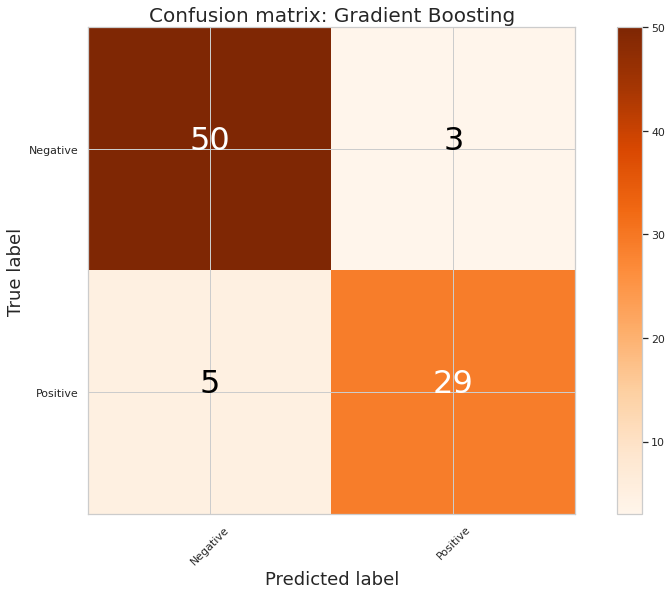

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_GBM.png')

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

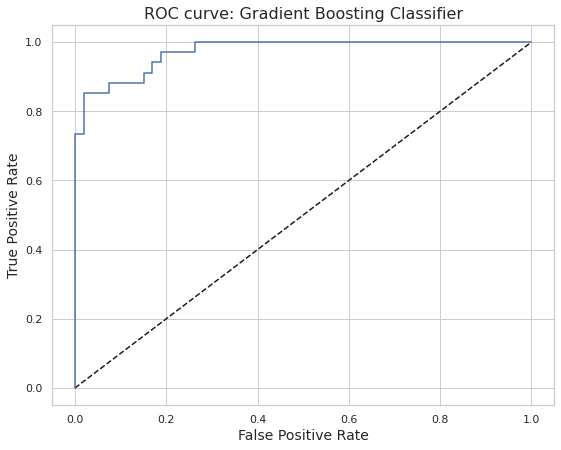

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve: Gradient Boosting Classifier',fontsize=16)
#plt.show()
plt.savefig('ROC_Curve_GBM.png')

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC Score of Gradient Boosting Machine Classifier: %.3f"% metrics.roc_auc_score(y_test, y_pred_proba))

ROC Score of Gradient Boosting Machine Classifier: 0.973


In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("Cross Validation Score of Gradient Boosting Machine Classifier: %.3f"%cross_val_score(gb, features, target, cv=10, scoring='roc_auc').mean())

Cross Validation Score of Gradient Boosting Machine Classifier: 0.956


In [ ]:
def get_fi(m, df):
    return pd.DataFrame({'col': X_test.columns, 'imp': m.feature_importances_}).sort_values('imp',ascending=False)

#lets get the feature importances for training set
fi = get_fi(gb,X_train)

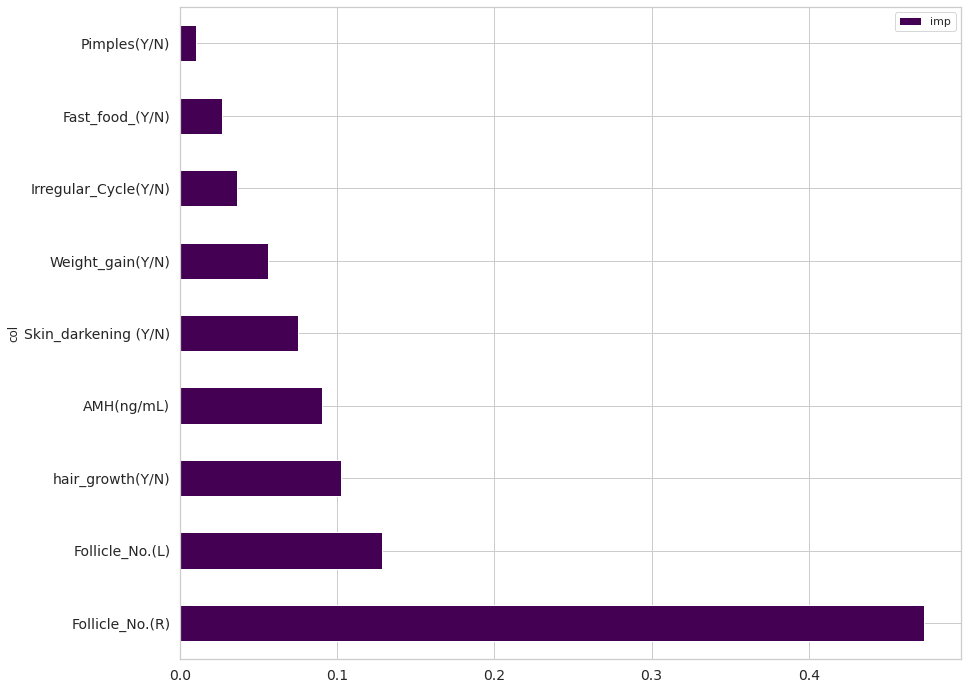

In [ ]:
def plot_fi(df):
    df.plot('col','imp','barh',figsize=(14,12),cmap='viridis', fontsize=14)
    
plot_fi(fi)
plt.savefig('Gradient Boosting Feature Importance.png')

# **XGBoost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(class_weight='balanced',n_estimators=200, learning_rate= 0.02, objective='binary:logistic',silent=True, nthread=1)

In [ ]:
# A parameter grid for XGBoost
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [ 1, 2,3],
        'subsample': [0.1, 0.2,0.4],
        'colsample_bytree': [0.2, 0.8,1.0],
        'max_depth': [3, 4, 5]
        #'learning_rate': [0.02,0.1]
        #'n_estimators':[200,400],
        }

In [ ]:
grid_tree=GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
grid_tree.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 734 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:   37.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     class_weight='balanced',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.02, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=1, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.2, 0.8, 1.0],
                         'gamma': [1, 2, 3], 'max_depth':

In [ ]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9297895189003438
{'colsample_bytree': 1.0, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.4}
XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              gamma=1, learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.4, verbosity=1)


In [ ]:
train_pred = grid_tree.best_estimator_.predict(X_train.values)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test.values)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.939
Test Accuracy: 0.931 

Train Recall: 0.885
Test Recall: 0.882 

Test F1: 0.909
Test Precision: 0.938


In [ ]:
xg= grid_tree.best_estimator_

In [ ]:
recalls['xgBoost'] = recall_score(y_test, y_pred)
accuracies['xgBoost'] = accuracy_score(y_test, y_pred)
precisions['xgBoost'] = precision_score(y_test, y_pred)
f1['xgBoost'] = f1_score(y_test, y_pred)
recalls

{'Decision_Tree': 0.8235294117647058,
 'Gradient_Boost': 0.8529411764705882,
 'KNN': 0.8529411764705882,
 'LogReg': 0.9411764705882353,
 'random_forest': 0.9117647058823529,
 'xgBoost': 0.8823529411764706}

In [ ]:
accuracies

{'Decision_Tree': 0.896551724137931,
 'Gradient_Boost': 0.9080459770114943,
 'KNN': 0.9080459770114943,
 'LogReg': 0.9540229885057471,
 'random_forest': 0.9425287356321839,
 'xgBoost': 0.9310344827586207}

In [ ]:
precisions

{'Decision_Tree': 0.9032258064516129,
 'Gradient_Boost': 0.90625,
 'KNN': 0.90625,
 'LogReg': 0.9411764705882353,
 'random_forest': 0.9393939393939394,
 'xgBoost': 0.9375}

In [ ]:
f1

{'Decision_Tree': 0.8615384615384616,
 'Gradient_Boost': 0.8787878787878787,
 'KNN': 0.8787878787878787,
 'LogReg': 0.9411764705882353,
 'random_forest': 0.9253731343283583,
 'xgBoost': 0.9090909090909091}

In [ ]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
sns.set_style('white')

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: XGBoost', fontsize=20)

Confusion Matrix, without normalization
[[51  2]
 [ 4 30]]


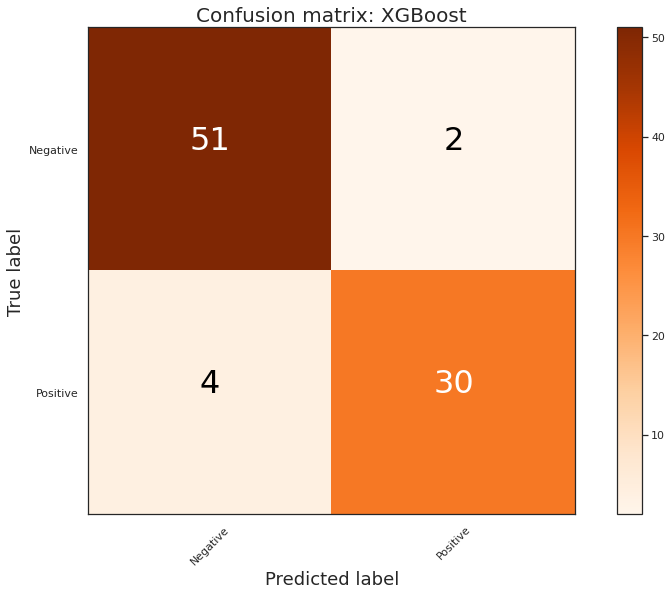

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_XGB.png')

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("Cross Validation Score of XGBoost Classifier: %.3f"%cross_val_score(xg, features, target, cv=10, scoring='roc_auc').mean())

Cross Validation Score of XGBoost Classifier: 0.964


In [ ]:
xg.feature_importances_

array([0.19413619, 0.1513311 , 0.16921179, 0.11820248, 0.1040794 ,
       0.062424  , 0.05955153, 0.0801228 , 0.06094061], dtype=float32)

In [ ]:
def get_fi(m, df):
    return pd.DataFrame({'col': X_test.columns, 'imp': m.feature_importances_}).sort_values('imp',ascending=False)

#lets get the feature importances for training set
fi = get_fi(xg,X_train)

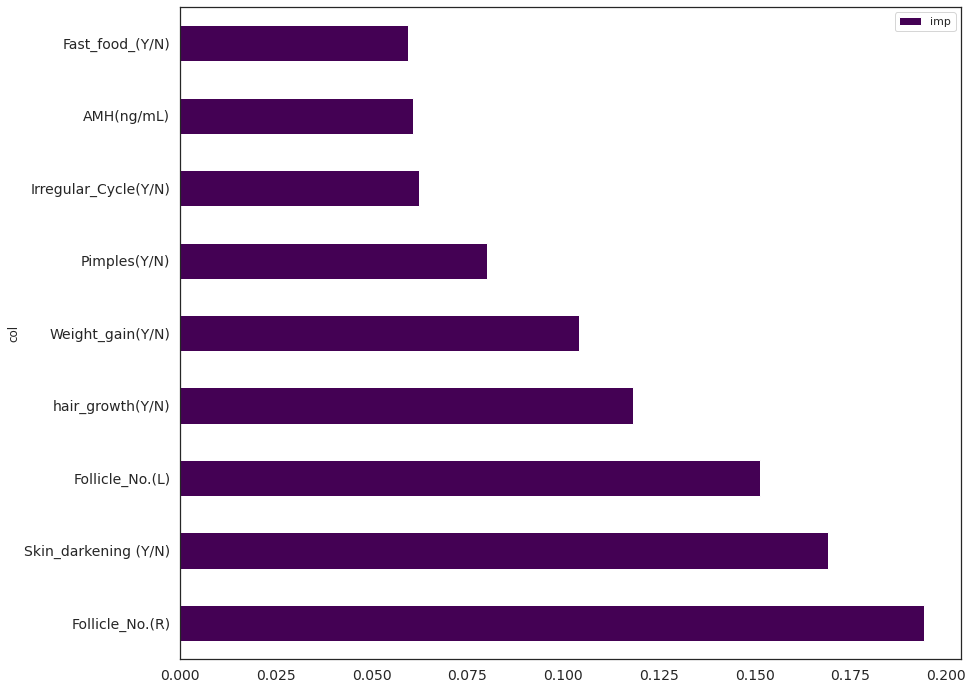

In [ ]:
def plot_fi(df):
    df.plot('col','imp','barh',figsize=(14,12),cmap='viridis', fontsize=14)
    
plot_fi(fi)
plt.savefig('XGBoost Feature Importance.png')

# **ADABoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()

In [ ]:
param_grid = {'n_estimators': [100,200,300],
              'algorithm': ['SAMME','SAMME.R'],
              'learning_rate': [0.01,0.1,1.0] }

In [ ]:
grid_tree=GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
grid_tree.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   28.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9194802405498281
{'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 300}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=300, random_state=None)


In [ ]:
train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.922
Test Accuracy: 0.920 

Train Recall: 0.885
Test Recall: 0.912 

Test F1: 0.899
Test Precision: 0.886


In [ ]:
ada= grid_tree.best_estimator_

In [ ]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.92      0.93        53
           1       0.89      0.91      0.90        34

    accuracy                           0.92        87
   macro avg       0.91      0.92      0.92        87
weighted avg       0.92      0.92      0.92        87

Confusion Matrix: 
 [[49  4]
 [ 3 31]]


In [ ]:
recalls['AdaBoost'] = recall_score(y_test, y_pred)
accuracies['AdaBoost'] = accuracy_score(y_test, y_pred)
precisions['AdaBoost'] = precision_score(y_test, y_pred)
f1['AdaBoost'] =f1_score(y_test, y_pred)
recalls

{'ADABoost': 0.9117647058823529,
 'Decision_Tree': 0.8235294117647058,
 'Gradient_Boost': 0.8529411764705882,
 'KNN': 0.8529411764705882,
 'LogReg': 0.9411764705882353,
 'random_forest': 0.9117647058823529,
 'xgBoost': 0.8823529411764706}

In [ ]:
accuracies

{'ADABoost': 0.9195402298850575,
 'Decision_Tree': 0.896551724137931,
 'Gradient_Boost': 0.9080459770114943,
 'KNN': 0.9080459770114943,
 'LogReg': 0.9540229885057471,
 'random_forest': 0.9425287356321839,
 'xgBoost': 0.9310344827586207}

In [ ]:
precisions

{'ADABoost': 0.8857142857142857,
 'Decision_Tree': 0.9032258064516129,
 'Gradient_Boost': 0.90625,
 'KNN': 0.90625,
 'LogReg': 0.9411764705882353,
 'random_forest': 0.9393939393939394,
 'xgBoost': 0.9375}

In [ ]:
f1

{'ADABoost': 0.8985507246376812,
 'Decision_Tree': 0.8615384615384616,
 'Gradient_Boost': 0.8787878787878787,
 'KNN': 0.8787878787878787,
 'LogReg': 0.9411764705882353,
 'random_forest': 0.9253731343283583,
 'xgBoost': 0.9090909090909091}

In [ ]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: AdaBoost', fontsize=20)

Confusion Matrix, without normalization
[[49  4]
 [ 3 31]]


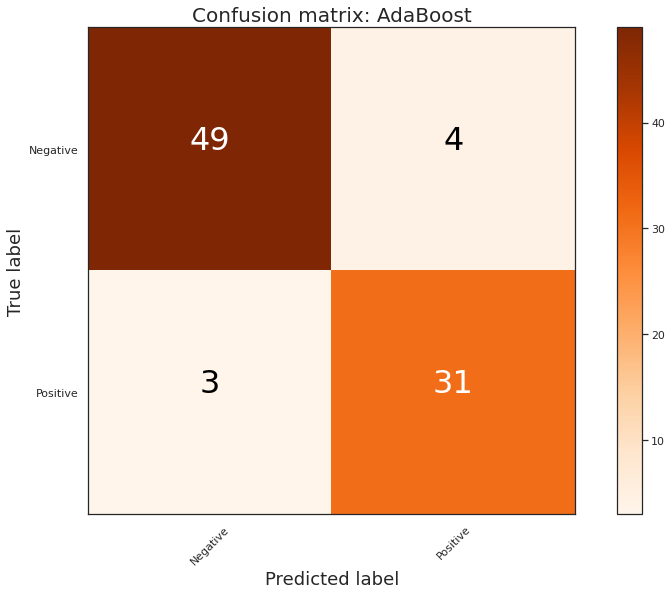

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_Ada.png')

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = ada.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

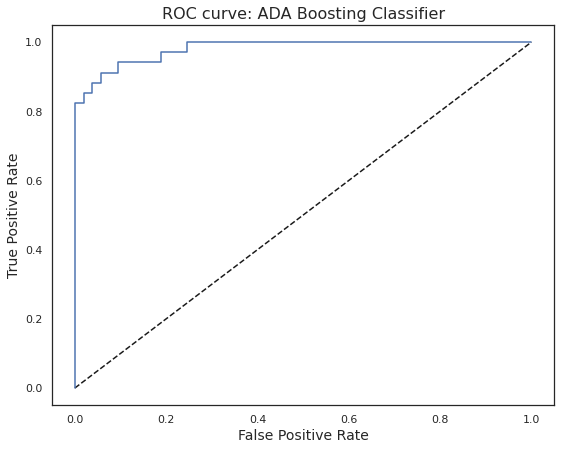

In [ ]:
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ADA Boosting Classifier')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve: ADA Boosting Classifier',fontsize=16)
#plt.show()
plt.savefig('ROC_Curve_Ada.png')

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC Score of AdaBoost Classifier: %.3f"%metrics.roc_auc_score(y_test, y_pred_proba))

ROC Score of AdaBoost Classifier: 0.981


In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("Cross Validation Score of AdaBoost Classifier: %.3f"%cross_val_score(ada, features, target, cv=10, scoring='roc_auc').mean())

Cross Validation Score of AdaBoost Classifier: 0.957


In [ ]:
def get_fi(m, df):
    return pd.DataFrame({'col': X_test.columns, 'imp': m.feature_importances_}).sort_values('imp',ascending=False)

#lets get the feature importances for training set
fi = get_fi(ada,X_train)

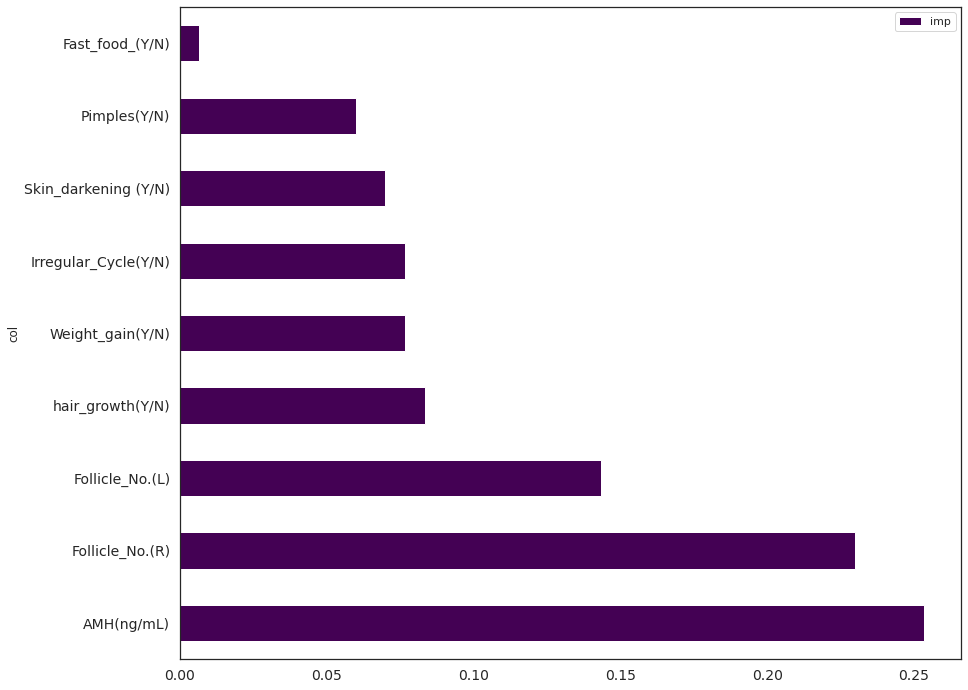

In [ ]:
def plot_fi(df):
    df.plot('col','imp','barh',figsize=(14,12),cmap='viridis', fontsize=14)
    
plot_fi(fi)
plt.savefig('AdaBoost Feature Importance.png')

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC 

In [ ]:
svm = SVC()

In [ ]:
# defining parameter range 
param_grid = {'C': [0.01, 0.1, 1, 10, 100,200],  
              'gamma': [1, 0.1, 0.01, 0.001,0.0001], 
              'kernel': ['rbf','linear','poly']}  

In [ ]:
grid_tree=GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
grid_tree.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    5.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 200],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9401847079037801
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.986
Test Accuracy: 0.862 

Train Recall: 1.000
Test Recall: 0.824 

Test F1: 0.824
Test Precision: 0.824


In [ ]:
svm= grid_tree.best_estimator_

In [ ]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.82      0.82      0.82        34

    accuracy                           0.86        87
   macro avg       0.86      0.86      0.86        87
weighted avg       0.86      0.86      0.86        87

Confusion Matrix: 
 [[47  6]
 [ 6 28]]


In [ ]:
recalls['SVM'] = recall_score(y_test, y_pred)
accuracies['SVM'] = accuracy_score(y_test, y_pred)
precisions['SVM'] = precision_score(y_test, y_pred)
f1['SVM'] = f1_score(y_test, y_pred)
recalls

{'ADABoost': 0.9117647058823529,
 'Decision_Tree': 0.8235294117647058,
 'Gradient_Boost': 0.8529411764705882,
 'KNN': 0.8529411764705882,
 'LogReg': 0.9411764705882353,
 'SVM': 0.8235294117647058,
 'random_forest': 0.9117647058823529,
 'xgBoost': 0.8823529411764706}

In [ ]:
accuracies

{'ADABoost': 0.9195402298850575,
 'Decision_Tree': 0.896551724137931,
 'Gradient_Boost': 0.9080459770114943,
 'KNN': 0.9080459770114943,
 'LogReg': 0.9540229885057471,
 'SVM': 0.8620689655172413,
 'random_forest': 0.9425287356321839,
 'xgBoost': 0.9310344827586207}

In [ ]:
precisions

{'ADABoost': 0.8857142857142857,
 'Decision_Tree': 0.9032258064516129,
 'Gradient_Boost': 0.90625,
 'KNN': 0.90625,
 'LogReg': 0.9411764705882353,
 'SVM': 0.8235294117647058,
 'random_forest': 0.9393939393939394,
 'xgBoost': 0.9375}

In [ ]:
f1

{'ADABoost': 0.8985507246376812,
 'Decision_Tree': 0.8615384615384616,
 'Gradient_Boost': 0.8787878787878787,
 'KNN': 0.8787878787878787,
 'LogReg': 0.9411764705882353,
 'SVM': 0.8235294117647058,
 'random_forest': 0.9253731343283583,
 'xgBoost': 0.9090909090909091}

In [ ]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: SVM', fontsize=20)

Confusion Matrix, without normalization
[[47  6]
 [ 6 28]]


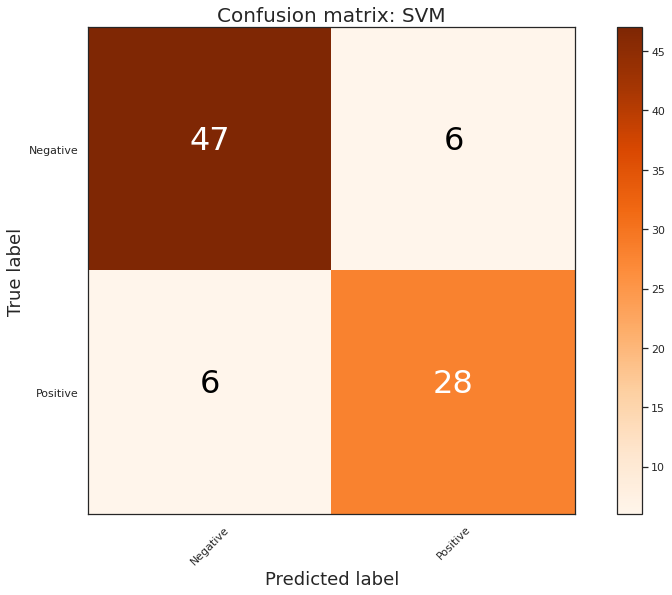

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_SVM.png')

In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("Cross Validation Score of SVM Classifier: %.3f"%cross_val_score(svm, features, target, cv=10, scoring='roc_auc').mean())

Cross Validation Score of SVM Classifier: 0.943


# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()

In [ ]:
# defining parameter range 
param_grid = {}

In [ ]:
grid_tree=GridSearchCV(gnb, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [ ]:
grid_tree.fit(X_train_res, y_train_res)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=-1, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9173539518900343
{}
GaussianNB(priors=None, var_smoothing=1e-09)


In [ ]:
train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.919
Test Accuracy: 0.908 

Train Recall: 0.894
Test Recall: 0.912 

Test F1: 0.886
Test Precision: 0.861


In [ ]:
nb= grid_tree.best_estimator_

In [ ]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.91      0.92        53
           1       0.86      0.91      0.89        34

    accuracy                           0.91        87
   macro avg       0.90      0.91      0.90        87
weighted avg       0.91      0.91      0.91        87

Confusion Matrix: 
 [[48  5]
 [ 3 31]]


In [ ]:
recalls['Naive Bayes'] = recall_score(y_test, y_pred)
accuracies['Naive Bayes'] = accuracy_score(y_test, y_pred)
precisions['Naive Bayes'] = precision_score(y_test, y_pred)
f1['Naive Bayes'] = f1_score(y_test, y_pred)
recalls

{'ADABoost': 0.9117647058823529,
 'Decision_Tree': 0.8235294117647058,
 'Gradient_Boost': 0.8529411764705882,
 'KNN': 0.8529411764705882,
 'LogReg': 0.9411764705882353,
 'Naive Bayes': 0.9117647058823529,
 'SVM': 0.8235294117647058,
 'random_forest': 0.9117647058823529,
 'xgBoost': 0.8823529411764706}

In [ ]:
accuracies

{'ADABoost': 0.9195402298850575,
 'Decision_Tree': 0.896551724137931,
 'Gradient_Boost': 0.9080459770114943,
 'KNN': 0.9080459770114943,
 'LogReg': 0.9540229885057471,
 'Naive Bayes': 0.9080459770114943,
 'SVM': 0.8620689655172413,
 'random_forest': 0.9425287356321839,
 'xgBoost': 0.9310344827586207}

In [ ]:
precisions

{'ADABoost': 0.8857142857142857,
 'Decision_Tree': 0.9032258064516129,
 'Gradient_Boost': 0.90625,
 'KNN': 0.90625,
 'LogReg': 0.9411764705882353,
 'Naive Bayes': 0.8611111111111112,
 'SVM': 0.8235294117647058,
 'random_forest': 0.9393939393939394,
 'xgBoost': 0.9375}

In [ ]:
f1

{'ADABoost': 0.8985507246376812,
 'Decision_Tree': 0.8615384615384616,
 'Gradient_Boost': 0.8787878787878787,
 'KNN': 0.8787878787878787,
 'LogReg': 0.9411764705882353,
 'Naive Bayes': 0.8857142857142858,
 'SVM': 0.8235294117647058,
 'random_forest': 0.9253731343283583,
 'xgBoost': 0.9090909090909091}

In [ ]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Naive Bayes', fontsize=20)

Confusion Matrix, without normalization
[[48  5]
 [ 3 31]]


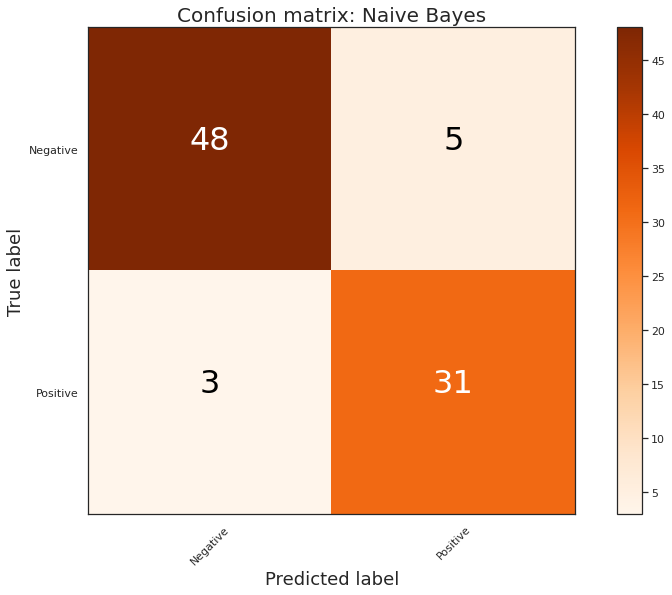

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_NB.png')

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = nb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

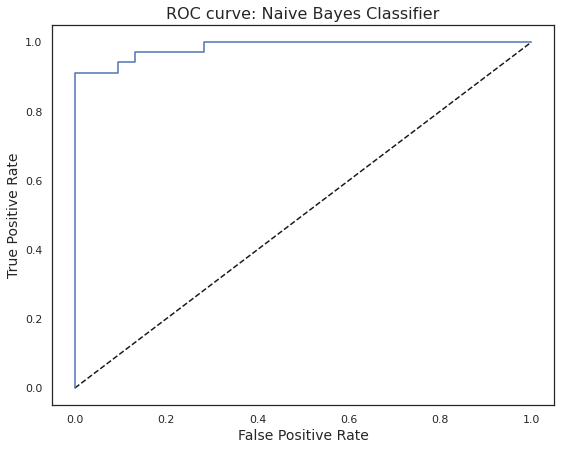

In [ ]:
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes Classifier')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve: Naive Bayes Classifier',fontsize=16)
#plt.show()
plt.savefig('ROC_Curve_NB.png')

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC Score of Naive Bayes Classifier: %.3f"%(metrics.roc_auc_score(y_test, y_pred_proba)))

ROC Score of Naive Bayes Classifier: 0.985


In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("Cross Validation Score of Naive Bayes Classifier: %.3f"%cross_val_score(nb, features, target, cv=10, scoring='roc_auc').mean())

Cross Validation Score of Naive Bayes Classifier: 0.967


# **Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# instantiate the best model objects
lr_clf = logreg
knn_clf = kn
ada_clf = ada
xg_clf = xg
svm_clf = svm
nb_clf=nb
rf_clf=rfc

In [ ]:
# put in different combinations of the best models to see which yeilds the best results
voting_clf = VotingClassifier(
                estimators=[('LogisticRegression', lr_clf),
                            ('ADAboost', ada_clf),('RandomForest', rf_clf)], voting='soft')

voting_clf.fit(X_train_res, y_train_res)

y_pred = voting_clf.predict(X_test)
train_pred = voting_clf.predict(X_train)


print('Train Accuracy: %.3f' % accuracy_score(y_train, train_pred ))
print("Test Accuracy: %.3f" % accuracy_score(y_test, y_pred), '\n')
print("Train Recall: %.3f"% recall_score(y_train, train_pred ))
print("Test Recall: %.3f"% recall_score(y_test, y_pred), '\n')
print("Test F1: %.3f"% f1_score(y_test, y_pred))
print("Test Precision: %.3f"% precision_score(y_test, y_pred))

Train Accuracy: 0.934
Test Accuracy: 0.931 

Train Recall: 0.904
Test Recall: 0.912 

Test F1: 0.912
Test Precision: 0.912


In [ ]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.91      0.91      0.91        34

    accuracy                           0.93        87
   macro avg       0.93      0.93      0.93        87
weighted avg       0.93      0.93      0.93        87

Confusion Matrix: 
 [[50  3]
 [ 3 31]]


In [ ]:
recalls['Voting Classifier'] = recall_score(y_test, y_pred)
accuracies['Voting Classifier'] = accuracy_score(y_test, y_pred)
precisions['Voting Classifier'] = precision_score(y_test, y_pred)
f1['Voting Classifier'] = f1_score(y_test, y_pred)
recalls

{'ADABoost': 0.9117647058823529,
 'Decision_Tree': 0.8235294117647058,
 'Gradient_Boost': 0.8529411764705882,
 'KNN': 0.8529411764705882,
 'LogReg': 0.9411764705882353,
 'Naive Bayes': 0.9117647058823529,
 'SVM': 0.8235294117647058,
 'Voting Classifier': 0.9117647058823529,
 'random_forest': 0.9117647058823529,
 'xgBoost': 0.8823529411764706}

In [ ]:
accuracies

{'ADABoost': 0.9195402298850575,
 'Decision_Tree': 0.896551724137931,
 'Gradient_Boost': 0.9080459770114943,
 'KNN': 0.9080459770114943,
 'LogReg': 0.9540229885057471,
 'Naive Bayes': 0.9080459770114943,
 'SVM': 0.8620689655172413,
 'Voting Classifier': 0.9310344827586207,
 'random_forest': 0.9425287356321839,
 'xgBoost': 0.9310344827586207}

In [ ]:
precisions

{'ADABoost': 0.8857142857142857,
 'Decision_Tree': 0.9032258064516129,
 'Gradient_Boost': 0.90625,
 'KNN': 0.90625,
 'LogReg': 0.9411764705882353,
 'Naive Bayes': 0.8611111111111112,
 'SVM': 0.8235294117647058,
 'Voting Classifier': 0.9117647058823529,
 'random_forest': 0.9393939393939394,
 'xgBoost': 0.9375}

In [ ]:
f1

{'ADABoost': 0.8985507246376812,
 'Decision_Tree': 0.8615384615384616,
 'Gradient_Boost': 0.8787878787878787,
 'KNN': 0.8787878787878787,
 'LogReg': 0.9411764705882353,
 'Naive Bayes': 0.8857142857142858,
 'SVM': 0.8235294117647058,
 'Voting Classifier': 0.9117647058823528,
 'random_forest': 0.9253731343283583,
 'xgBoost': 0.9090909090909091}

In [ ]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Voting Classifier', fontsize=20)

Confusion Matrix, without normalization
[[50  3]
 [ 3 31]]


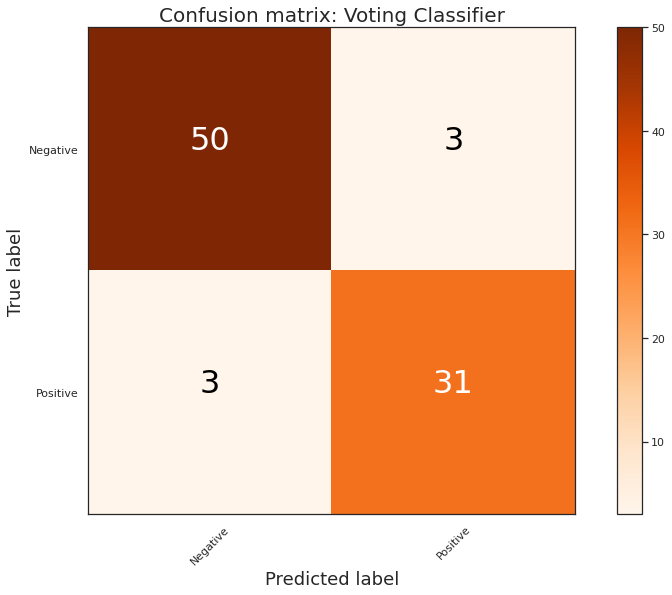

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_Vote.png')

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = voting_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

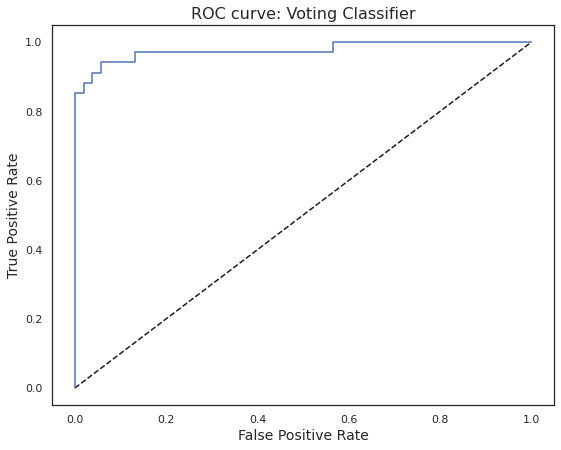

In [ ]:
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Voting Classifier')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve: Voting Classifier',fontsize=16)
#plt.show()
plt.savefig('ROC_Curve_Vote.png')

In [ ]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print("ROC Score of VotingClassifier: %.3f"%(metrics.roc_auc_score(y_test, y_pred_proba)))

ROC Score of VotingClassifier: 0.976


In [ ]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
print("Cross Validation Score of VotingClassifier: %.3f"%cross_val_score(svm, features, target, cv=10, scoring='roc_auc').mean())

Cross Validation Score of VotingClassifier: 0.943


# **Artificial Neural Network**

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import random as rn
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from random import shuffle

In [ ]:
dataset = norm_df.values

In [ ]:
dataset

array([[ 0.        , -0.82071122, -0.73993195, ...,  0.96815923,
        -0.97896382, -0.60418407],
       [ 0.        , -0.36994496, -0.73993195, ..., -1.03097872,
        -0.97896382, -0.69607171],
       [ 1.        ,  1.88388637,  1.62452867, ...,  0.96815923,
         1.01960006,  0.17175604],
       ...,
       [ 0.        , -1.49686062, -1.21282407, ..., -1.03097872,
        -0.97896382, -0.32681951],
       [ 0.        , -0.14456182,  0.2058523 , ..., -1.03097872,
         1.01960006, -0.07157605],
       [ 1.        ,  0.75697071,  0.67874443, ...,  0.96815923,
         1.01960006,  2.44682606]])

In [ ]:
#X = dataset[:,1:7]
X = dataset[:,1:10]

In [ ]:
X

array([[-0.82071122, -0.73993195, -0.6647168 , ...,  0.96815923,
        -0.97896382, -0.60418407],
       [-0.36994496, -0.73993195, -0.6647168 , ..., -1.03097872,
        -0.97896382, -0.69607171],
       [ 1.88388637,  1.62452867, -0.6647168 , ...,  0.96815923,
         1.01960006,  0.17175604],
       ...,
       [-1.49686062, -1.21282407, -0.6647168 , ..., -1.03097872,
        -0.97896382, -0.32681951],
       [-0.14456182,  0.2058523 , -0.6647168 , ..., -1.03097872,
         1.01960006, -0.07157605],
       [ 0.75697071,  0.67874443,  1.50161928, ...,  0.96815923,
         1.01960006,  2.44682606]])

In [ ]:
Y = dataset[:,0]

In [ ]:
Y

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0.

In [ ]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.3,random_state=23)
#X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5,random_state=23)

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(378, 9) (81, 9) (82, 9) (378,) (81,) (82,)


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (378, 9)
Number transactions y_train dataset:  (378,)
Number transactions X_test dataset:  (82, 9)
Number transactions y_test dataset:  (82,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

Before OverSampling, counts of label '1': 121
Before OverSampling, counts of label '0': 257 



In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, Y_train.ravel())

In [ ]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (514, 9)
After OverSampling, the shape of train_y: (514,) 

After OverSampling, counts of label '1': 257
After OverSampling, counts of label '0': 257


In [ ]:
model_3 = Sequential([    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(9,)),    Dropout(0.4),    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.4),    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.4),    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.4),    Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)),    Dropout(0.4),   Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])

In [ ]:
model_3.compile(optimizer='adam',              loss='binary_crossentropy',              metrics=['accuracy'])

In [ ]:
hist_3 = model_3.fit(X_train_res, y_train_res,       batch_size=514, epochs=100,          validation_data=(X_val, Y_val))

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.6624 - accuracy: 0.5039 - val_loss: 13.1947 - val_accuracy: 0.2963
Epoch 2/100
1/1 [==============================] - 0s 117ms/step - loss: 13.1746 - accuracy: 0.5195 - val_loss: 12.7202 - val_accuracy: 0.4691
Epoch 3/100
1/1 [==============================] - 0s 105ms/step - loss: 12.6979 - accuracy: 0.5428 - val_loss: 12.2555 - val_accuracy: 0.5802
Epoch 4/100
1/1 [==============================] - 0s 104ms/step - loss: 12.2307 - accuracy: 0.5953 - val_loss: 11.8029 - val_accuracy: 0.7407
Epoch 5/100
1/1 [==============================] - 0s 105ms/step - loss: 11.7791 - accuracy: 0.6595 - val_loss: 11.3619 - val_accuracy: 0.7901
Epoch 6/100
1/1 [==============================] - 0s 100ms/step - loss: 11.3412 - accuracy: 0.6673 - val_loss: 10.9334 - val_accuracy: 0.8272
Epoch 7/100
1/1 [==============================] - 0s 100ms/step - loss: 10.9212 - accuracy: 0.7101 - val_loss: 10.5172 - val_accuracy: 0.8642
Ep

In [ ]:
model_3.evaluate(X_test, Y_test)[1]

3/3 [==============================] - 0s 8ms/step - loss: 0.7265 - accuracy: 0.9024


0.9024389982223511

In [ ]:
predictions_3 = model_3.predict(X_test) > 0.5

In [ ]:
predictions_3_train = model_3.predict(X_train) > 0.5

In [ ]:
confusion_matrix(Y_test, predictions_3)

array([[46,  4],
       [ 4, 28]])

In [ ]:
#accuracy_score(Y_train, predictions_3_train)

train_pred = grid_tree.best_estimator_.predict(X_train)  # predict on the train set
y_pred = grid_tree.best_estimator_.predict(X_test)  # predict on the test set

print('Train Accuracy: %.3f' % accuracy_score(Y_train, predictions_3_train ))
print("Test Accuracy: %.3f" % accuracy_score(Y_test, predictions_3), '\n')
print("Train Recall: %.3f"% recall_score(Y_train, predictions_3_train ))
print("Test Recall: %.3f"% recall_score(Y_test, predictions_3), '\n')
print("Test F1: %.3f"% f1_score(Y_test, predictions_3))
print("Test Precision: %.3f"% precision_score(Y_test, predictions_3))

Train Accuracy: 0.921
Test Accuracy: 0.902 

Train Recall: 0.901
Test Recall: 0.875 

Test F1: 0.875
Test Precision: 0.875


In [ ]:
print("Classification Report: \n\n", classification_report(Y_test, predictions_3))
print("Confusion Matrix: \n", metrics.confusion_matrix(Y_test, predictions_3))

Classification Report: 

               precision    recall  f1-score   support

         0.0       0.92      0.92      0.92        50
         1.0       0.88      0.88      0.88        32

    accuracy                           0.90        82
   macro avg       0.90      0.90      0.90        82
weighted avg       0.90      0.90      0.90        82

Confusion Matrix: 
 [[46  4]
 [ 4 28]]


In [ ]:
cm = confusion_matrix(Y_test, predictions_3)
classes = ['Negative', 'Positive']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: ANN', fontsize=20)

Confusion Matrix, without normalization
[[46  4]
 [ 4 28]]


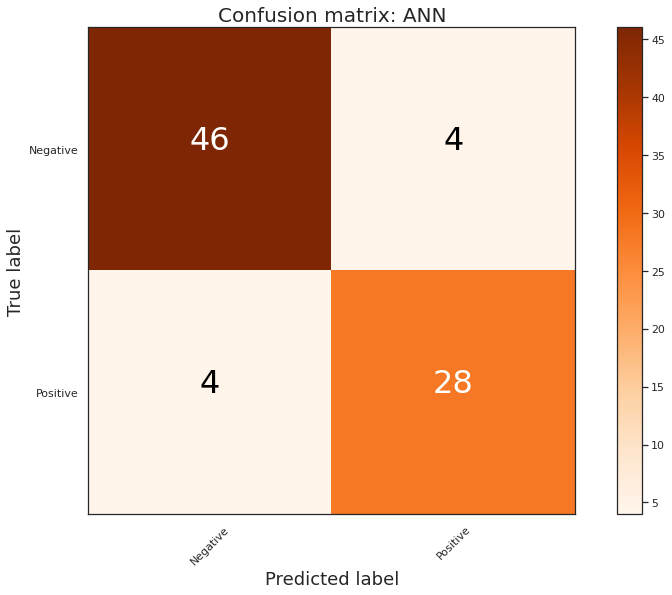

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_ANN.png')

In [ ]:
predictions_val_3 = model_3.predict(X_val) > 0.5

In [ ]:
accuracy_score(Y_val, predictions_val_3)

0.9135802469135802

In [ ]:
print("Classification Report VALIDATION: \n\n", classification_report(Y_val, predictions_val_3))
print("Confusion Matrix VALIDATION: \n", metrics.confusion_matrix(Y_val, predictions_val_3))

Classification Report VALIDATION: 

               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        57
         1.0       0.84      0.88      0.86        24

    accuracy                           0.91        81
   macro avg       0.89      0.90      0.90        81
weighted avg       0.91      0.91      0.91        81

Confusion Matrix VALIDATION: 
 [[53  4]
 [ 3 21]]


In [ ]:
print('Train Recall: ', recall_score(Y_train, predictions_3_train ))
print("Test Recall:", recall_score(Y_test, predictions_3))
print("Validation Recall:", recall_score(Y_val, predictions_val_3), '\n')
print("Validation Accuracy:", accuracy_score(Y_val, predictions_val_3))
print("Test F1:", f1_score(Y_test, predictions_3))
print("Validation F1:", f1_score(Y_val, predictions_val_3))
print("Validation precision:", precision_score(Y_val, predictions_val_3))

Train Recall:  0.9008264462809917
Test Recall: 0.875
Validation Recall: 0.875 

Validation Accuracy: 0.9135802469135802
Test F1: 0.875
Validation F1: 0.8571428571428572
Validation precision: 0.84


In [ ]:
recalls['Artificial Neural Network'] = recall_score(Y_test, predictions_3)
accuracies['Artificial Neural Network'] = accuracy_score(Y_test, predictions_3)
precisions['Artificial Neural Network'] = precision_score(Y_test, predictions_3)
f1['Artificial Neural Network'] = f1_score(Y_test, predictions_3)
recalls

{'ADABoost': 0.9117647058823529,
 'Artificial Neural Network': 0.875,
 'Decision_Tree': 0.8235294117647058,
 'Gradient_Boost': 0.8529411764705882,
 'KNN': 0.8529411764705882,
 'LogReg': 0.9411764705882353,
 'Naive Bayes': 0.9117647058823529,
 'SVM': 0.8235294117647058,
 'Voting Classifier': 0.9117647058823529,
 'random_forest': 0.9117647058823529,
 'xgBoost': 0.8823529411764706}

In [ ]:
accuracies

{'ADABoost': 0.9195402298850575,
 'Artificial Neural Network': 0.9024390243902439,
 'Decision_Tree': 0.896551724137931,
 'Gradient_Boost': 0.9080459770114943,
 'KNN': 0.9080459770114943,
 'LogReg': 0.9540229885057471,
 'Naive Bayes': 0.9080459770114943,
 'SVM': 0.8620689655172413,
 'Voting Classifier': 0.9310344827586207,
 'random_forest': 0.9425287356321839,
 'xgBoost': 0.9310344827586207}

In [ ]:
precisions

{'ADABoost': 0.8857142857142857,
 'Artificial Neural Network': 0.875,
 'Decision_Tree': 0.9032258064516129,
 'Gradient_Boost': 0.90625,
 'KNN': 0.90625,
 'LogReg': 0.9411764705882353,
 'Naive Bayes': 0.8611111111111112,
 'SVM': 0.8235294117647058,
 'Voting Classifier': 0.9117647058823529,
 'random_forest': 0.9393939393939394,
 'xgBoost': 0.9375}

In [ ]:
f1

{'ADABoost': 0.8985507246376812,
 'Artificial Neural Network': 0.875,
 'Decision_Tree': 0.8615384615384616,
 'Gradient_Boost': 0.8787878787878787,
 'KNN': 0.8787878787878787,
 'LogReg': 0.9411764705882353,
 'Naive Bayes': 0.8857142857142858,
 'SVM': 0.8235294117647058,
 'Voting Classifier': 0.9117647058823528,
 'random_forest': 0.9253731343283583,
 'xgBoost': 0.9090909090909091}

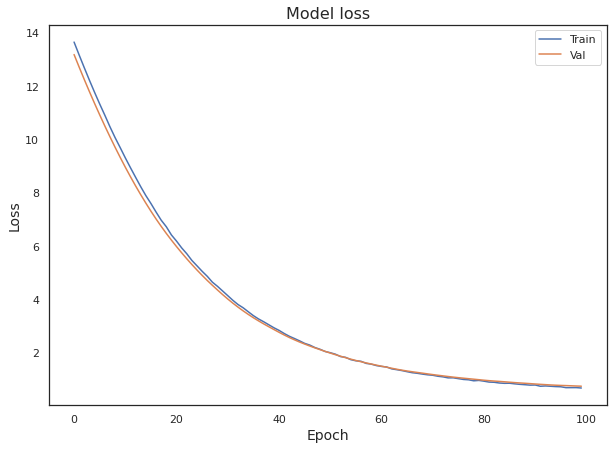

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss',fontsize=16)
plt.ylabel('Loss',fontsize=14)
plt.xlabel('Epoch',fontsize=14)
plt.legend(['Train', 'Val'], loc='upper right')
#plt.show()
plt.savefig('Model_Loss_ANN.png')

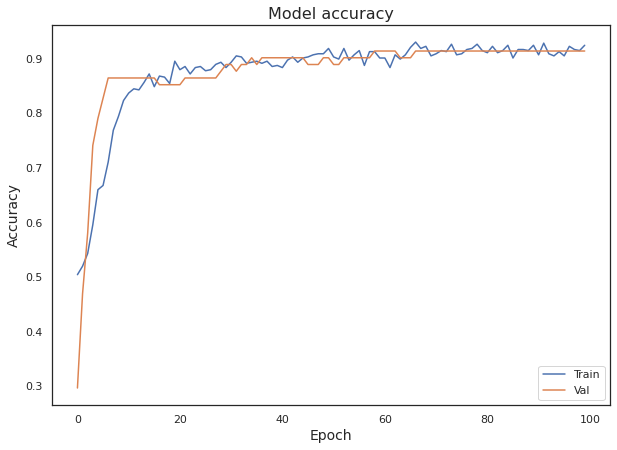

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy',fontsize=16)
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Epoch',fontsize=14)
plt.legend(['Train', 'Val'], loc='lower right')
#plt.show()
plt.savefig('Model_Accuracy_ANN.png')

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               1

In [ ]:
np.random.seed(1)
rn.seed(1)
tf.random.set_seed(2)

# **Final Model**

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)  # avoid outputing scientific notation
scores = pd.DataFrame.from_dict(recalls, orient='index', columns=['Recall Score'])
scores['Recall Score']= scores['Recall Score']*100
scores

,Recall Score
LogReg,94.118
Decision_Tree,82.353
KNN,85.294
random_forest,91.176
Gradient_Boost,85.294
xgBoost,88.235
ADABoost,91.176
SVM,82.353
Naive Bayes,91.176
Voting Classifier,91.176


In [ ]:
best_accuracies = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracy Score'])
best_accuracies['Accuracy Score']= best_accuracies['Accuracy Score']*100
best_accuracies

,Accuracy Score
LogReg,95.402
Decision_Tree,89.655
KNN,90.805
random_forest,94.253
Gradient_Boost,90.805
xgBoost,93.103
ADABoost,91.954
SVM,86.207
Naive Bayes,90.805
Voting Classifier,93.103


In [ ]:
best_accuracies.sort_values(by='Accuracy Score', ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,Accuracy Score
LogReg,95.402
random_forest,94.253
xgBoost,93.103
Voting Classifier,93.103
ADABoost,91.954
KNN,90.805
Gradient_Boost,90.805
Naive Bayes,90.805
Artificial Neural Network,90.244
Decision_Tree,89.655


In [ ]:
scores.sort_values(by='Recall Score', ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,Recall Score
LogReg,94.118
random_forest,91.176
ADABoost,91.176
Naive Bayes,91.176
Voting Classifier,91.176
xgBoost,88.235
Artificial Neural Network,87.500
KNN,85.294
Gradient_Boost,85.294
Decision_Tree,82.353


In [ ]:
best_precisions = pd.DataFrame.from_dict(precisions, orient='index', columns=['Precision Score'])
best_precisions['Precision Score']= best_precisions['Precision Score']*100
best_precisions.sort_values(by='Precision Score', ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,Precision Score
LogReg,94.118
random_forest,93.939
xgBoost,93.750
Voting Classifier,91.176
KNN,90.625
Gradient_Boost,90.625
Decision_Tree,90.323
ADABoost,88.571
Artificial Neural Network,87.500
Naive Bayes,86.111


In [ ]:
best_f1 = pd.DataFrame.from_dict(accuracies, orient='index', columns=['f1 Score'])
best_f1['f1 Score']= best_f1['f1 Score']*100
best_f1.sort_values(by='f1 Score', ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)

,f1 Score
LogReg,95.402
random_forest,94.253
xgBoost,93.103
Voting Classifier,93.103
ADABoost,91.954
KNN,90.805
Gradient_Boost,90.805
Naive Bayes,90.805
Artificial Neural Network,90.244
Decision_Tree,89.655


In [ ]:
best_accuracies

,Accuracy Score
LogReg,95.402
Decision_Tree,89.655
KNN,90.805
random_forest,94.253
Gradient_Boost,90.805
xgBoost,93.103
ADABoost,91.954
SVM,86.207
Naive Bayes,90.805
Voting Classifier,93.103


In [ ]:
final_accuracies= best_accuracies.drop(['SVM','Decision_Tree','KNN','Gradient_Boost','xgBoost'],inplace=False)
final_accuracies

,Accuracy Score
LogReg,95.402
random_forest,94.253
ADABoost,91.954
Naive Bayes,90.805
Voting Classifier,93.103
Artificial Neural Network,90.244


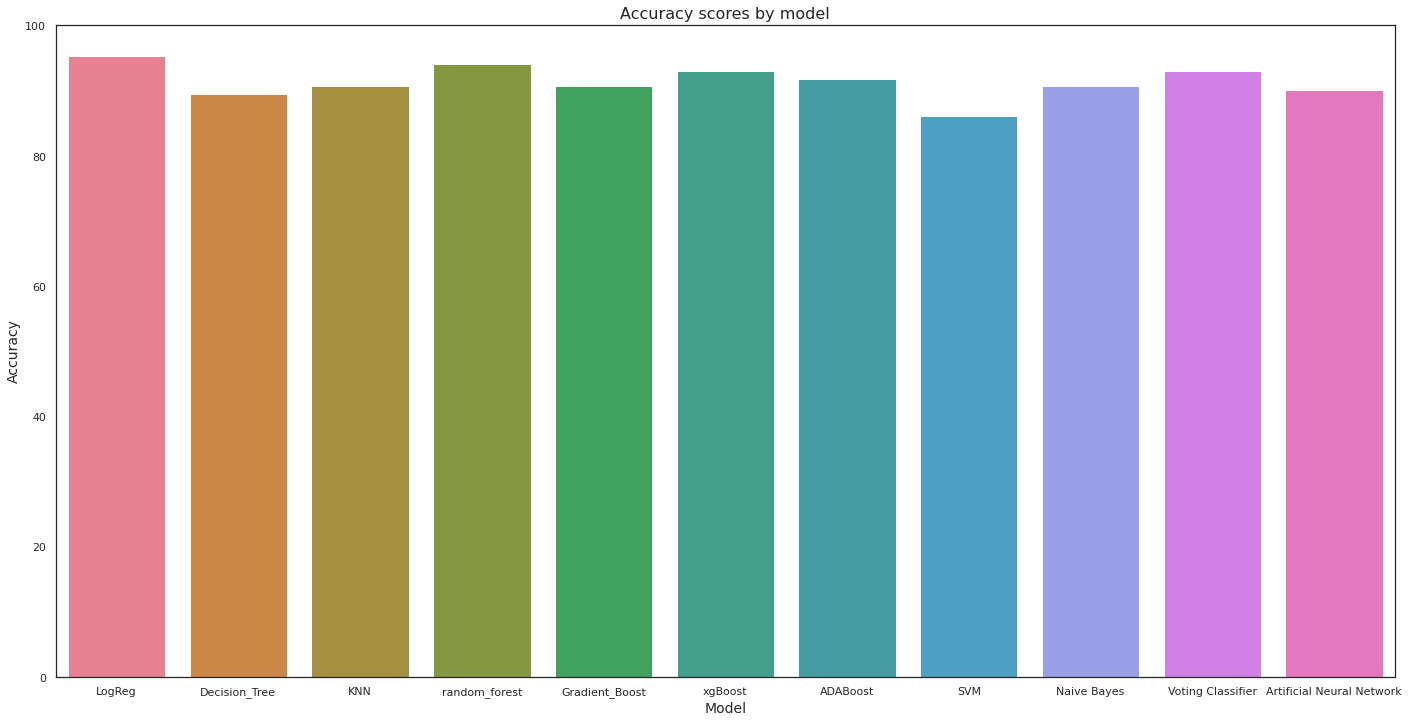

In [ ]:
best_accuracies
plt.figure(figsize= (24,12))
sns.barplot(x = best_accuracies.index, y =best_accuracies['Accuracy Score'], palette= 'husl')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Model',fontsize=14)
plt.title('Accuracy scores by model',fontsize=16)
#plt.show()
plt.savefig('Best_accuracies.png')


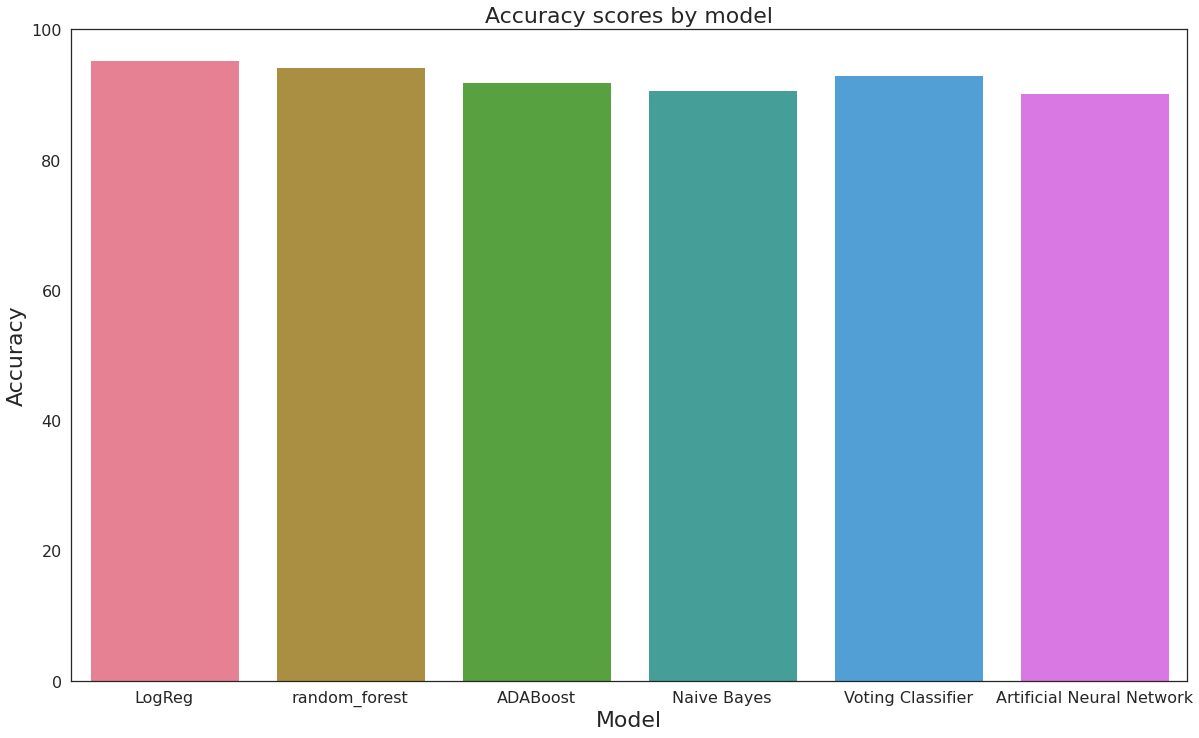

In [ ]:
final_accuracies
plt.figure(figsize= (20,12))
b=sns.barplot(x = final_accuracies.index, y =final_accuracies['Accuracy Score'], palette= 'husl')
plt.ylabel('Accuracy',fontsize=22)
plt.xlabel('Model',fontsize=22)
plt.title('Accuracy scores by model',fontsize=22)
b.tick_params(labelsize=16)
#plt.show()
plt.savefig('Best_accuracies_final.png')

In [ ]:
final_model = logreg
#final_model = voting_clf

In [ ]:
final_model.fit(test_features,test_target)
#logreg.fit(small_feat,small_target)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = final_model.predict(test_features)  # make predictions on the target variable

print(" Final Model Recall: %.3f" % recall_score(test_target, y_pred), '\n')
print("Final model Accuracy: %.3f" % accuracy_score(test_target, y_pred), '\n')
print("Final model Precision: %.3f" % precision_score(test_target, y_pred), '\n')
print("Final model f1 Score: %.3f" % f1_score(test_target, y_pred), '\n')
print("Final model Confusion Matrix: \n", metrics.confusion_matrix(test_target, y_pred))



 Final Model Recall: 0.872 

Final model Accuracy: 0.944 

Final model Precision: 0.971 

Final model f1 Score: 0.919 

Final model Confusion Matrix: 
 [[68  1]
 [ 5 34]]


In [ ]:
# save the scoring metrics in a dataframe
pd.DataFrame(data=[recall_score(test_target, y_pred),accuracy_score(test_target, y_pred),precision_score(test_target, y_pred), f1_score(test_target,y_pred)],
             index=["Recall", "Accuracy","Precision","F1 Score"],columns=['Final Model'])

,Final Model
Recall,0.872
Accuracy,0.944
Precision,0.971
F1 Score,0.919


In [ ]:
print("Classification Report: \n\n", classification_report(test_target, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(test_target, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.99      0.96        69
           1       0.97      0.87      0.92        39

    accuracy                           0.94       108
   macro avg       0.95      0.93      0.94       108
weighted avg       0.95      0.94      0.94       108

Confusion Matrix: 
 [[68  1]
 [ 5 34]]


In [ ]:
cm = confusion_matrix(test_target,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Final Model', fontsize=20)

Confusion Matrix, without normalization
[[68  1]
 [ 5 34]]


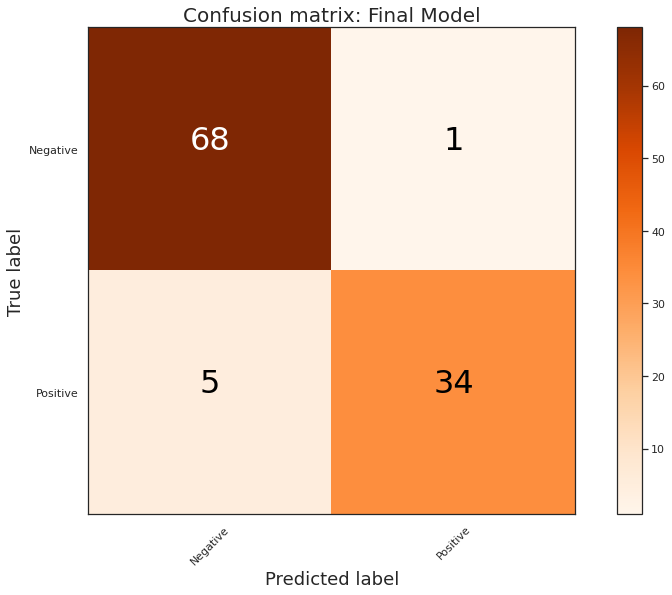

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_Final_Model.png')

In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = final_model.predict_proba(test_features)[:,1]
fpr, tpr, thresholds = roc_curve(test_target, y_pred_proba)

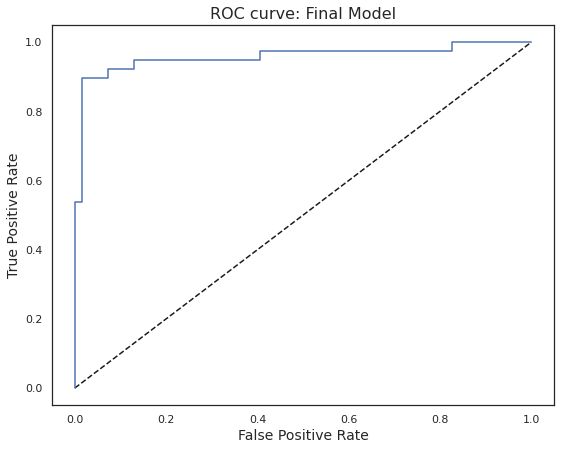

In [ ]:
plt.figure(figsize=(9,7))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Final Model')
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC curve: Final Model',fontsize=16)
#plt.show()
plt.savefig('ROC_Curve_Final_Model.png')

In [ ]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [ ]:
evaluate_threshold(0.5)

Sensitivity: 0.5384615384615384
Specificity: 0.9855072463768116


In [ ]:
evaluate_threshold(0.40)

Sensitivity: 0.9230769230769231
Specificity: 0.927536231884058


In [ ]:

THRESHOLD = 0.45  # adjust the threshold
y_pred = np.where(final_model.predict_proba(test_features)[:,1] > THRESHOLD, 1, 0)  # make predictions based on threshold

# save the scoring metrics in a dataframe
pd.DataFrame(data=[recall_score(test_target, y_pred),accuracy_score(test_target, y_pred),precision_score(test_target, y_pred), f1_score(test_target,y_pred)],
             index=["Recall", "Accuracy","Precision","F1 Score"],columns=['45% threshold'])

,45% threshold
Recall,0.897
Accuracy,0.935
Precision,0.921
F1 Score,0.909


In [ ]:
print(metrics.confusion_matrix(test_target, y_pred))

[[66  3]
 [ 4 35]]


In [ ]:
cm = confusion_matrix(test_target,y_pred)
classes = ['Negative', 'Positive']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.figure(figsize=(12,8))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=32,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.figure(fig)
    plt.ylabel('True label', fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)
    plt.title('Confusion matrix: Final Model(0.45 Threshold)', fontsize=20)

Confusion Matrix, without normalization
[[66  3]
 [ 4 35]]


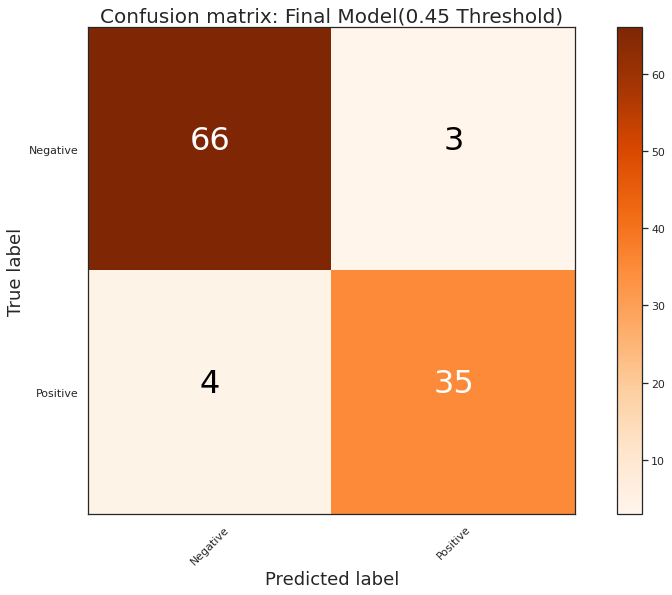

In [ ]:
import itertools
plt.figure(figsize=(12,8))
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)
plt.savefig('Confusion_matrix_Final_Model_Validation.png')

In [ ]:
final_model.fit(model_feat,model_target)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
final_model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = final_model.predict(model_feat)  # make predictions on the target variable

print(" Test Recall: ", recall_score(model_target, y_pred), '\n')
print("Test Accuracy:", accuracy_score(model_target, y_pred), '\n')

print(metrics.confusion_matrix(model_target, y_pred))

 Test Recall:  0.8531073446327684 

Test Accuracy: 0.9149722735674677 

[[344  20]
 [ 26 151]]


In [ ]:
import pickle

pickle_out = open("logistic_best.sav","wb")
pickle.dump(final_model, pickle_out)
pickle_out.close()